In [1]:
# Imports

import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sys
import h5py

from __future__ import division, print_function

import illustris_api as ia

from numpy import loadtxt
from os import listdir

/Users/sandyspicer/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Illustris API Configuration
ia.set_apikey('4e2c93455bbc8e991a91a61ef5e11daa')

h = 0.704

snap = 60
z = 3

lower = 0.0128
upper = 0.0132

def test_plot(fname):
    f = h5py.File(fname,'r')
    x = f['PartType0']['Coordinates'][:,0]
    z = f['PartType0']['Coordinates'][:,1]
    dens = numpy.log10(f['PartType0']['Masses'][:])
    import matplotlib.pyplot as pyplot
    pyplot.figure()
    pyplot.hist2d(z,x,weights=dens,bins=[150,100])
    pyplot.show()


files = None
#files = ['cutout_41094.hdf5.orig'] # uncomment and set this to suppress to downloading

if files is None: 

    halo_data_prelim = ia.obtain_halos_by_mass(lower, upper, snap)

    c = halo_data_prelim['count']
    if ia.DEBUG: print(c)

    halo_ids, halo_data = ia.obtain_subhalos_data(halo_data_prelim, snap, z)

    halo_ids, halo_data = ia.filter_haloids(halo_ids, halo_data, filters=[ia.filter_non_zero_mass, ia.filter_star_mass, ia.filter_fluid_mass], args=[None, {'lower': 0.0001, 'upper': 0.0995}, {'lower': 0.00001, 'upper': 0.01}])

    if ia.DEBUG: print(halo_ids[:])

    ia.store_metadata(halo_data)

    files = ia.obtain_cutouts(halo_data, gascols=['Coordinates', 'Density', 'GFM_Metallicity', 'Masses', 'SmoothingLength', 'Velocities'], starcols=['Coordinates', 'Masses', 'Velocities','GFM_Metallicity'], count=None)

    Ldata = []
    ia.detilt_files(files, halo_data, L_outputs=Ldata)
    if ia.DEBUG: print(Ldata)

ia.process_cutouts_for_splash(files)

Setting API Key to 4e2c93455bbc8e991a91a61ef5e11daa
 Obtaining subhalos in mass range 0.0128 to 0.0132 at snapshot 60.000000
   2914 subhalos will be obtained in 100-element chunks
 Obtaining metadata for 2914 subhalos
     0 % done
     10 % done
     20 % done
     30 % done
     40 % done
     50 % done
     60 % done
     70 % done
     80 % done
     90 % done
     100 % done
Initial idn set = 2914
2914
Applying filter filter_non_zero_mass
 0 eliminated due to less than epsilon mass
 1 eliminated due to less than epsilon mass
 2 eliminated due to less than epsilon mass
 4 eliminated due to less than epsilon mass
 5 eliminated due to less than epsilon mass
 6 eliminated due to less than epsilon mass
 7 eliminated due to less than epsilon mass
 8 eliminated due to less than epsilon mass
 9 eliminated due to less than epsilon mass
 10 eliminated due to less than epsilon mass
 11 eliminated due to less than epsilon mass
 12 eliminated due to less than epsilon mass
 13 eliminated due t

 1560 eliminated due to less than epsilon mass
 1562 eliminated due to less than epsilon mass
 1563 eliminated due to less than epsilon mass
 1564 eliminated due to less than epsilon mass
 1565 eliminated due to less than epsilon mass
 1567 eliminated due to less than epsilon mass
 1568 eliminated due to less than epsilon mass
 1569 eliminated due to less than epsilon mass
 1571 eliminated due to less than epsilon mass
 1572 eliminated due to less than epsilon mass
 1573 eliminated due to less than epsilon mass
 1575 eliminated due to less than epsilon mass
 1576 eliminated due to less than epsilon mass
 1577 eliminated due to less than epsilon mass
 1578 eliminated due to less than epsilon mass
 1579 eliminated due to less than epsilon mass
 1580 eliminated due to less than epsilon mass
 1581 eliminated due to less than epsilon mass
 1582 eliminated due to less than epsilon mass
 1583 eliminated due to less than epsilon mass
 1584 eliminated due to less than epsilon mass
 1585 elimina

 2618 eliminated due to less than epsilon mass
 2619 eliminated due to less than epsilon mass
 2620 eliminated due to less than epsilon mass
 2621 eliminated due to less than epsilon mass
 2622 eliminated due to less than epsilon mass
 2623 eliminated due to less than epsilon mass
 2624 eliminated due to less than epsilon mass
 2625 eliminated due to less than epsilon mass
 2626 eliminated due to less than epsilon mass
 2627 eliminated due to less than epsilon mass
 2628 eliminated due to less than epsilon mass
 2629 eliminated due to less than epsilon mass
 2630 eliminated due to less than epsilon mass
 2631 eliminated due to less than epsilon mass
 2632 eliminated due to less than epsilon mass
 2633 eliminated due to less than epsilon mass
 2634 eliminated due to less than epsilon mass
 2635 eliminated due to less than epsilon mass
 2636 eliminated due to less than epsilon mass
 2637 eliminated due to less than epsilon mass
 2638 eliminated due to less than epsilon mass
 2639 elimina

 Obtaining cutout of halo 22690 at redshift 3.000000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
 Obtaining cutout of halo 31000 at redshift 3.000000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
 Obtaining cutout of halo 49283 at redshift 3.000000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
 Obtaining cutout of halo 76688 at redshift 3.000000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
 Obtaining cutout of halo 84138 at redshift 3.000000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
 Obtaining cutout of halo 156903 at redshift 3.000000
 

 Obtaining cutout of halo 407741 at redshift 3.000000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
 Obtaining cutout of halo 409786 at redshift 3.000000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
 Obtaining cutout of halo 412403 at redshift 3.000000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
 Obtaining cutout of halo 414420 at redshift 3.000000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
 Obtaining cutout of halo 419138 at redshift 3.000000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
 Obtaining cutout of halo 425421 at redshift 3.000

 Obtaining cutout of halo 818914 at redshift 3.000000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
 Obtaining cutout of halo 925757 at redshift 3.000000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 1.2897
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 2.4104
Limiting angular momentum calculation to r < 0

/Users/sandyspicer/Desktop/RIT/Illustris-3/groups_135/illustris_api/dwarf/z=3/illustris_api.py:1037: RuntimeWarning: invalid value encountered in true_divide
  Lhat = totL/modL # this is the direction the total angular momentum vector points


Limiting angular momentum calculation to r < 4.0697
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 2.4238
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 2.231
Limiting angular momentum calculation to r < 1.6943
Limiting angular momentum calculation to r < 2.3283
Limiting angular momentum calculation to r < 1.7972
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 2.7016
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 2.6513
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 0
Limiting angular momentum calculation to r < 2.3306
Limiting angular momentum calculation to r < 3.7052
Limiting an

 "splashifying" cutout_589434.hdf5, output will be saved to cutout_589434_splash.hdf5
 "splashifying" cutout_600849.hdf5, output will be saved to cutout_600849_splash.hdf5
 "splashifying" cutout_612167.hdf5, output will be saved to cutout_612167_splash.hdf5
 "splashifying" cutout_615350.hdf5, output will be saved to cutout_615350_splash.hdf5
 "splashifying" cutout_617512.hdf5, output will be saved to cutout_617512_splash.hdf5
 "splashifying" cutout_654402.hdf5, output will be saved to cutout_654402_splash.hdf5
 "splashifying" cutout_655755.hdf5, output will be saved to cutout_655755_splash.hdf5
 "splashifying" cutout_660071.hdf5, output will be saved to cutout_660071_splash.hdf5
 "splashifying" cutout_661563.hdf5, output will be saved to cutout_661563_splash.hdf5
 "splashifying" cutout_664474.hdf5, output will be saved to cutout_664474_splash.hdf5
 "splashifying" cutout_689390.hdf5, output will be saved to cutout_689390_splash.hdf5
 "splashifying" cutout_704225.hdf5, output will be sav

In [3]:
# Creates arrays of stellar mass, fluid mass, and virial mass

stellar_mass = []
fluid_mass = []
virial_mass = []

# Loops over halo data and appends stellar masses and fluid masses to arrays
for h in halo_data:
    stellar_mass.append(h['mass_stars'])
    fluid_mass.append(h['mass_gas'])
    
# Loops over halo data and halo ids to create virial mass array for the galaxies that met the mass cuts
for i in range(0,len(halo_data_prelim['results'])):
    for j in range(0,len(halo_ids)):
        if halo_data_prelim['results'][i]['id'] == halo_ids[j]:
            virial_mass.append(halo_data_prelim['results'][i]['mass_log_msun'])
            
print(halo_ids)    
print(stellar_mass)
print(fluid_mass)
print(virial_mass)


[2171, 22690, 31000, 49283, 76688, 84138, 156903, 159560, 186089, 191548, 210415, 215261, 232811, 237294, 241464, 248255, 253291, 256201, 259486, 271879, 284225, 286053, 294834, 300871, 301684, 303139, 303152, 309419, 316328, 324719, 328932, 328976, 333849, 340318, 359148, 365203, 368865, 374409, 383010, 383219, 385452, 386612, 391429, 403223, 406177, 407741, 409786, 412403, 414420, 419138, 425421, 436520, 436867, 439635, 442717, 461016, 490596, 494949, 501548, 511902, 514058, 522284, 530873, 537796, 541093, 543558, 546790, 547774, 564510, 566957, 568847, 589434, 600849, 612167, 615350, 617512, 654402, 655755, 660071, 661563, 664474, 689390, 704225, 749541, 760437, 765984, 789178, 800546, 804297, 818914, 925757]
[0.000172, 0.00013, 0.000103, 0.000171, 0.000147, 0.000113, 0.000157, 0.000107, 0.000107, 0.000102, 0.000111, 0.000152, 0.000124, 0.000347, 0.00036, 0.000229, 0.000716, 0.000107, 0.000134, 0.000164, 0.000409, 0.000256, 0.000311, 0.000131, 0.000103, 0.000177, 0.000112, 0.00012, 

In [4]:
# This function grabs the HI abundance from Illustris and takes the mean value

def get_HI(halo_ids):
    f = []
    HI = []
    mean = []
    for i in halo_ids:
        f = h5py.File('/Users/sandyspicer/Desktop/RIT/Illustris-3/groups_135/illustris_api/dwarf/z=3/cutout_'+str(i)+'.hdf5', 'r')
        HI.append(f['PartType0']['NeutralHydrogenAbundance'][:])
        
    for j in range(0,len(HI)):
        mean.append(numpy.ndarray.mean(HI[j]))

    return mean

In [5]:
HI_abundance = get_HI(halo_ids)
print(HI_abundance)
print(halo_ids)

[0.65551305, 0.6963881, 0.4069048, 0.7423268, 0.6732543, 0.637103, 0.7662275, 0.3022629, 0.68543446, 0.48360214, 0.7211759, 0.39146027, 0.2657981, 0.35560408, 0.7501423, 0.27897575, 0.06759301, 0.78921854, 0.7331596, 0.6423121, 0.42190084, 0.05818704, 0.6123842, 0.65191793, 0.5304167, 0.7806617, 0.6300213, 0.7446469, 0.7351948, 0.75429696, 0.7637342, 0.68642324, 0.22692412, 0.72607774, 0.76364917, 0.5572991, 0.4947658, 0.7388208, 0.82662404, 0.54547924, 0.7836185, 0.6428639, 0.7063463, 0.68022996, 0.73935056, 0.7688983, 0.67706394, 0.7383599, 0.66433287, 0.74407166, 0.6493806, 0.479703, 0.68255126, 0.681457, 0.7391295, 0.67953163, 0.79405487, 0.68450457, 0.6454709, 0.67679113, 0.6354231, 0.747529, 0.7357097, 0.7773398, 0.7417281, 0.7937336, 0.7876864, 0.7059705, 0.7112528, 0.78189796, 0.66577363, 0.692922, 0.73486364, 0.69378185, 0.69801044, 0.6752245, 0.65923345, 0.65733844, 0.64949554, 0.65397066, 0.75037074, 0.76368797, 0.713465, 0.70967716, 0.63683367, 0.72081554, 0.57372594, 0.429

In [6]:
# This function converts HI abundance to HI mass

def get_HI_mass(HI_abundance,fluid_mass):
    
    number_density = []
    MHI = []
    
    # This is the mass of a proton in units of 10^10 Msol/h
    m_p = 1.6726219e-27 * (1 / 1.989e30) * (1 / 10e10) * 0.704 # units of 10^10 Msol/h
    
    # This loops over the fluid masses and converts it to the number density of hydrogen
    for m in fluid_mass:
        n = m / m_p 
        number_density.append(n)
     
    # This loops over the HI abundance and multiplies the number density of hydrgoen by the HI abundance to get the number density of HI
    # It then multiplies the number density of HI by the mass of a proton to obtain the mass of HI
    for i in range(0,len(HI_abundance)):
        
        n_HI = HI_abundance[i] * number_density[i]
        mhi = n_HI * m_p
        MHI.append(mhi)
        
    return MHI

In [7]:
HI = get_HI_mass(HI_abundance,fluid_mass)
print(HI)
print(fluid_mass)
print(halo_ids)

[0.0003474219155311585, 0.0006727109291553496, 0.00035075192624330526, 0.0015952602847218512, 0.00024641107785701753, 0.0007925561583042145, 0.0009156418430805207, 0.00013420472860336304, 0.0005942716773748398, 0.00012815456613898276, 0.0008170923049449921, 0.0005210336189568043, 6.51205325126648e-05, 0.00025923537603020667, 0.0009226749998331069, 0.00010852156868577004, 6.286149770021438e-06, 0.00043801629245281224, 0.0011349310634136199, 0.0002768365191817284, 0.00032612934824824343, 5.73724228516221e-05, 0.0005670677692890167, 0.00033964924383163454, 0.0007277317495346069, 0.0003598850446939468, 0.0005487485297322273, 0.0012927070302963257, 0.0006807903869152068, 0.0006170149120092392, 0.0015137212269306184, 0.0007310407528281212, 0.00011073897123336792, 0.0010578952605128289, 0.002439095435023308, 0.0002290499208569527, 0.0004126346674561501, 0.0007269996585845947, 0.0008191844195127487, 0.0006136641427874564, 0.0009520964893698692, 0.0016585889375209807, 8.334886026382447e-05, 0.0

In [8]:
# This only appends Lhat vectors that have values and removes nan values
# It creates an array of the indices called 'entry' that have real values
Lhat = []
entry = []
for i in range(0,len(Ldata)):
    Lhat.append(Ldata[i][2])
    angm = Ldata[i][2]
    if abs(angm[0])>0:
        entry.append(i)
        
print(Lhat)

[array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32), array([-0.00108672,  0.9820485 , -0.1886253 ], dtype=float32), array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32), array([-0.9579826 , -0.01203377, -0.2865738 ], dtype=float32), array([nan, nan, nan], dtype=float32), array([-0.15626852, -0.9819593 , -0.10647106], dtype=float32), array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32), array([ 0.4414452 , -0.15500912,  0.88379765], dtype=float32), array([-0.94526994,  0.1300963 , -0.29923183], dtype=float32), array([nan, nan, nan]

In [9]:
# This function plots the metallicity distribution as a column density plot
# It reads in the filename and Lhat vector
# It plots the galaxy in all three planes
# It also does a check on which plane has the largest Lhat vector. It then plots the 'best view' of the galaxy in the other two planes 

def metallicity_plot(fname,Lhat):
    f = h5py.File(fname,'r')
    x = f['PartType0']['Coordinates'][:,0]
    z = f['PartType0']['Coordinates'][:,1]
    y = f['PartType0']['Coordinates'][:,2]
    
    met = f['PartType0']['GFM_Metallicity'][:]/0.0127
    
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    
    plt.figure()
    plt.hist2d(z,y,weights=met,bins=[200,100],norm=mpl.colors.LogNorm())
    plt.colorbar()
    #plt.clim(0.1, 1)
    plt.title(str(fname))
    plt.show()
    print('YZ-plane')

    plt.figure()
    plt.hist2d(x,y,weights=met,bins=[200,100],norm=mpl.colors.LogNorm())
    plt.colorbar()
    #plt.clim(0.1, 1)
    plt.title(str(fname))
    plt.show()
    print('XY-plane')

    plt.figure()
    plt.hist2d(z,x,weights=met,bins=[200,100],norm=mpl.colors.LogNorm())
    plt.colorbar()
    #plt.clim(0.1, 1)
    plt.title(str(fname))
    plt.show()
    print('XZ-plane')
    
    print("------------------------Best cutout--------------------------")
    

    if abs(Lhat[0]) >= abs(Lhat[1]) and abs(Lhat[0]) >= abs(Lhat[2]):
        plt.figure()
        plt.hist2d(z,y,weights=met,bins=[200,100],norm=mpl.colors.LogNorm())
        plt.colorbar()
        #plt.clim(0.1, 1)
        plt.title(str(fname))
        plt.show()
        print('YZ-plane')

    if abs(Lhat[1]) >= abs(Lhat[0]) and abs(Lhat[1]) >= abs(Lhat[2]):
        plt.figure()
        plt.hist2d(x,y,weights=met,bins=[200,100],norm=mpl.colors.LogNorm())
        plt.colorbar()
        #plt.clim(0.1, 1)
        plt.title(str(fname))
        plt.show()
        print('XY-plane')

    if abs(Lhat[2]) >= abs(Lhat[0]) and abs(Lhat[2]) >= abs(Lhat[1]):
        plt.figure()
        plt.hist2d(z,x,weights=met,bins=[200,100],norm=mpl.colors.LogNorm())
        plt.colorbar()
        #plt.clim(0.1, 1)
        plt.title(str(fname))
        plt.show()
        print('XZ-plane')
        
        
    # This plots the minimum and maximum metallicity
    print(min(met),max(met))
    print(Lhat)
    print("------------------------Best cutout--------------------------")

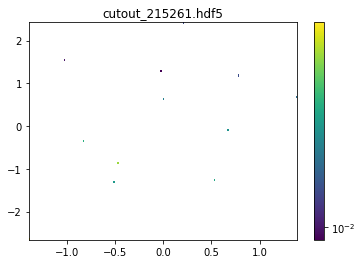

YZ-plane


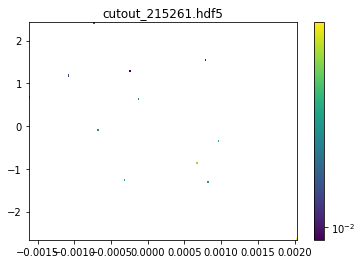

XY-plane


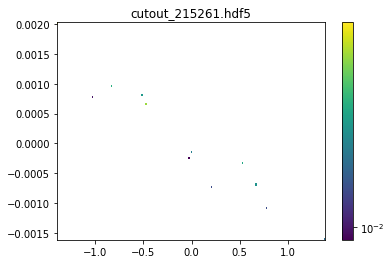

XZ-plane
------------------------Best cutout--------------------------


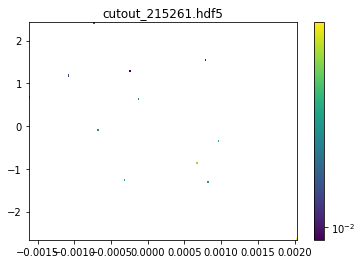

XY-plane
0.009655005 0.01735776
[-0.00108672  0.9820485  -0.1886253 ]
------------------------Best cutout--------------------------


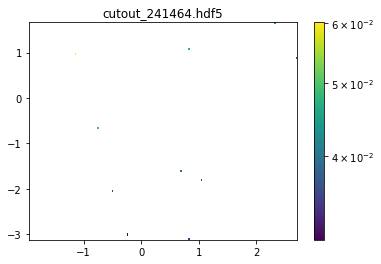

YZ-plane


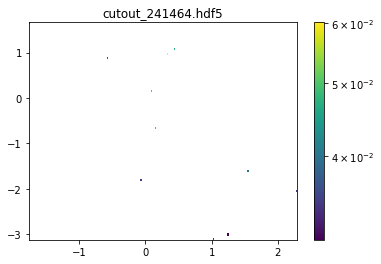

XY-plane


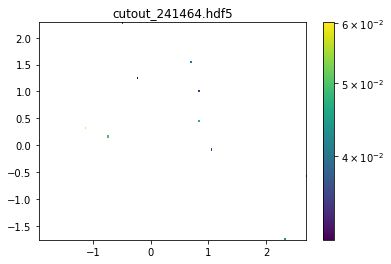

XZ-plane
------------------------Best cutout--------------------------


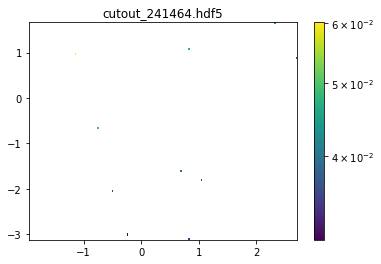

YZ-plane
0.031005913 0.060150746
[-0.9579826  -0.01203377 -0.2865738 ]
------------------------Best cutout--------------------------


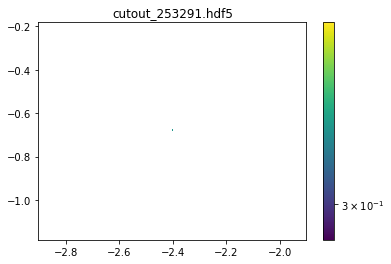

YZ-plane


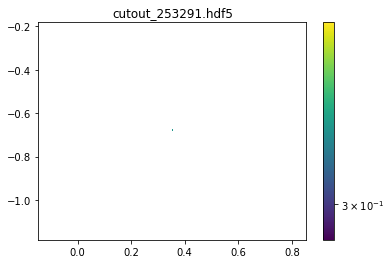

XY-plane


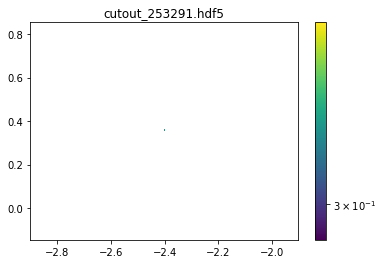

XZ-plane
------------------------Best cutout--------------------------


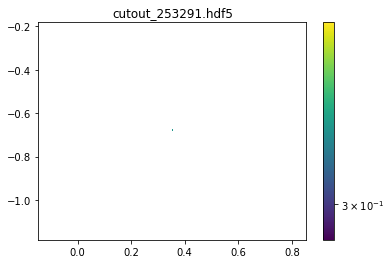

XY-plane
0.3224922 0.3224922
[-0.15626852 -0.9819593  -0.10647106]
------------------------Best cutout--------------------------


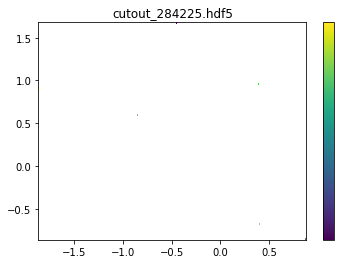

YZ-plane


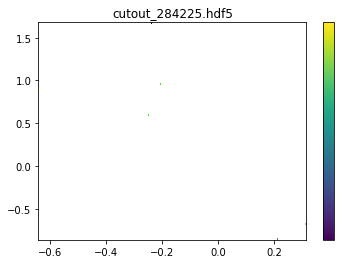

XY-plane


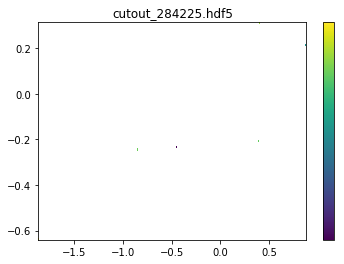

XZ-plane
------------------------Best cutout--------------------------


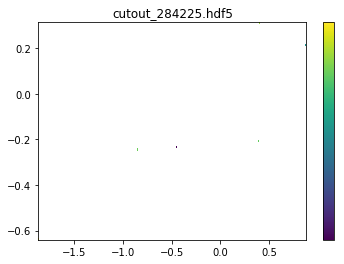

XZ-plane
0.2553119 0.28259498
[ 0.4414452  -0.15500912  0.88379765]
------------------------Best cutout--------------------------


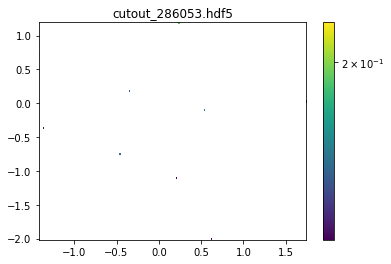

YZ-plane


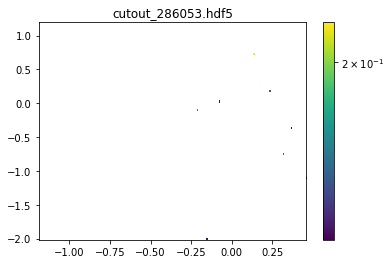

XY-plane


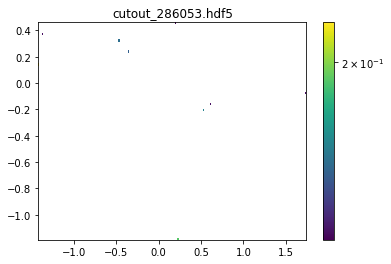

XZ-plane
------------------------Best cutout--------------------------


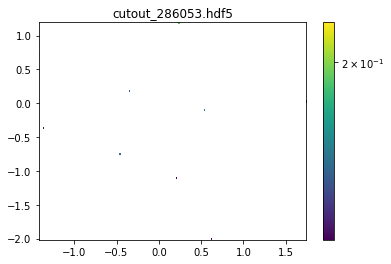

YZ-plane
0.1423119 0.21594378
[-0.94526994  0.1300963  -0.29923183]
------------------------Best cutout--------------------------


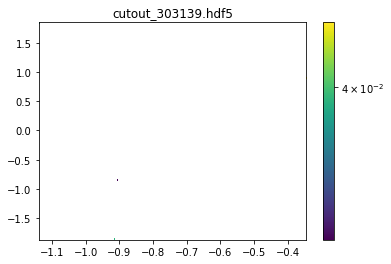

YZ-plane


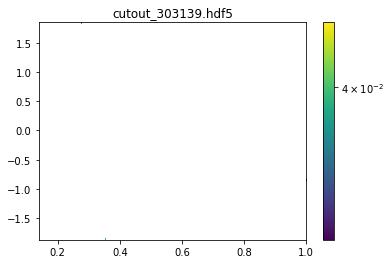

XY-plane


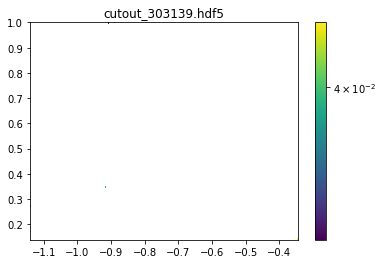

XZ-plane
------------------------Best cutout--------------------------


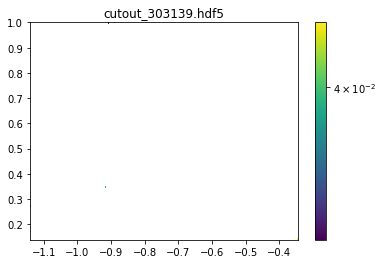

XZ-plane
0.0303655 0.044981707
[-0.60968083  0.4506221  -0.6520959 ]
------------------------Best cutout--------------------------


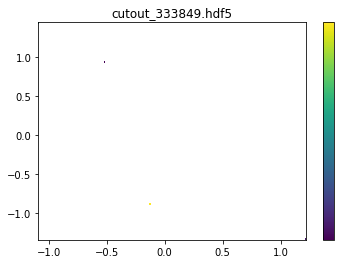

YZ-plane


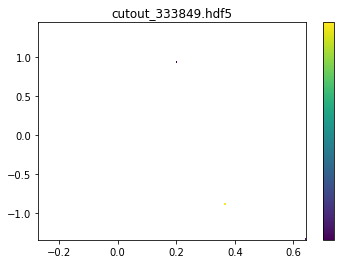

XY-plane


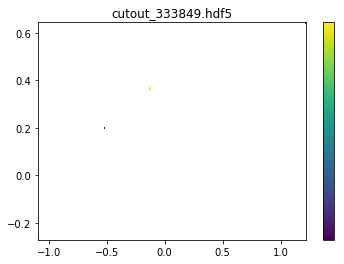

XZ-plane
------------------------Best cutout--------------------------


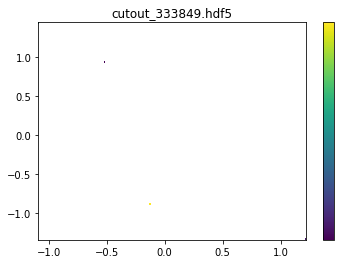

YZ-plane
0.15096016 0.19351827
[-0.78786093 -0.06762992 -0.61212856]
------------------------Best cutout--------------------------


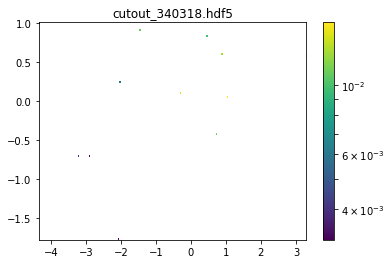

YZ-plane


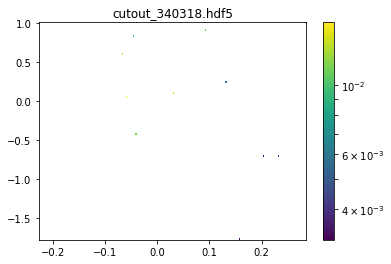

XY-plane


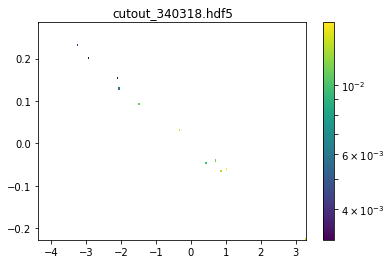

XZ-plane
------------------------Best cutout--------------------------


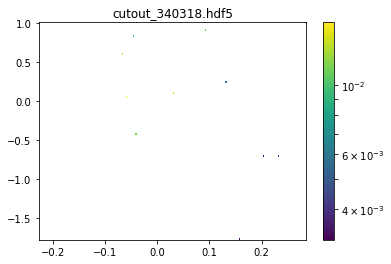

XY-plane
0.0031951738 0.015893448
[-0.06848208  0.9855233  -0.1550936 ]
------------------------Best cutout--------------------------


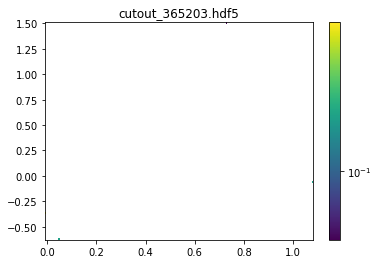

YZ-plane


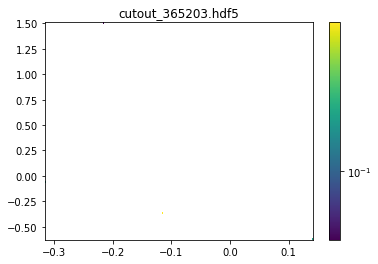

XY-plane


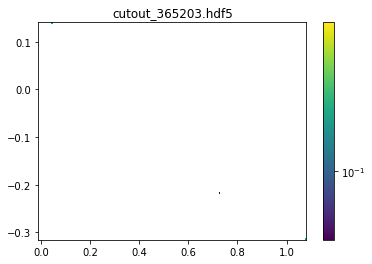

XZ-plane
------------------------Best cutout--------------------------


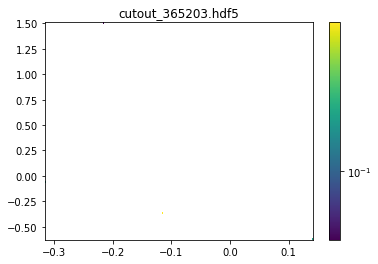

XY-plane
0.09584435 0.10961797
[-0.3439513 -0.9388589  0.0155396]
------------------------Best cutout--------------------------


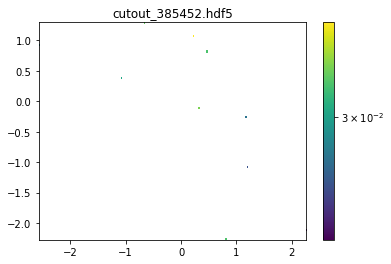

YZ-plane


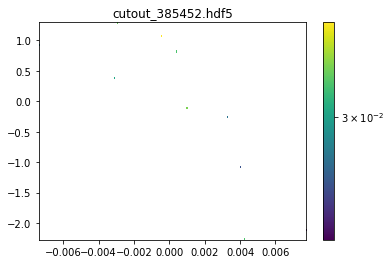

XY-plane


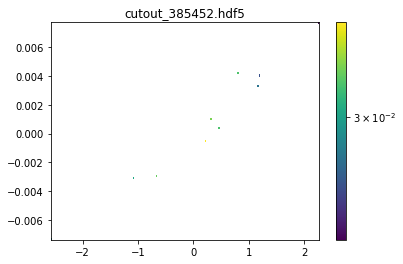

XZ-plane
------------------------Best cutout--------------------------


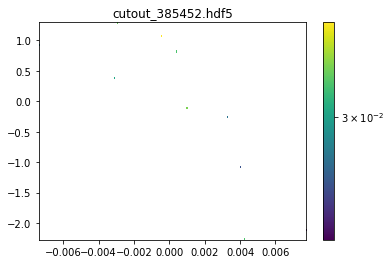

XY-plane
0.021067271 0.039307486
[0.00270546 0.93465555 0.35554424]
------------------------Best cutout--------------------------


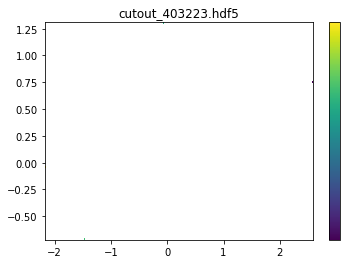

YZ-plane


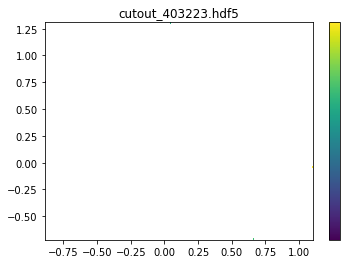

XY-plane


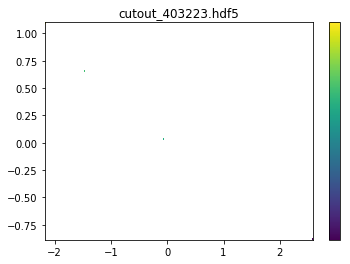

XZ-plane
------------------------Best cutout--------------------------


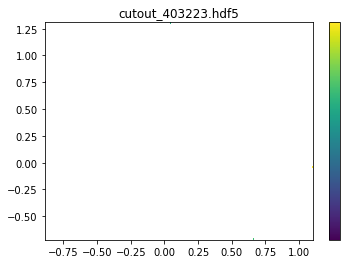

XY-plane
0.033817124 0.037112113
[-0.49816936  0.86702967 -0.00932292]
------------------------Best cutout--------------------------


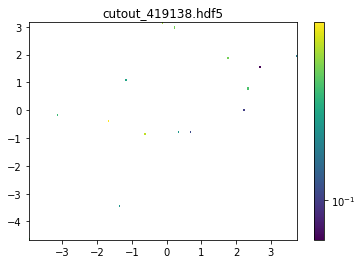

YZ-plane


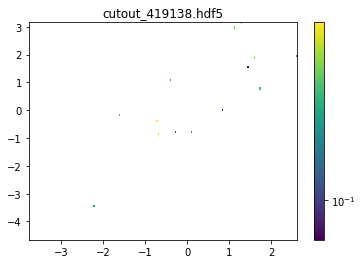

XY-plane


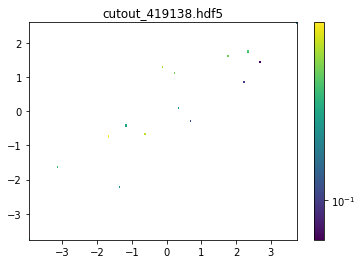

XZ-plane
------------------------Best cutout--------------------------


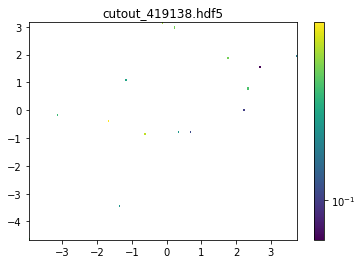

YZ-plane
0.09438567 0.12990953
[ 0.67010546 -0.46074912 -0.58195263]
------------------------Best cutout--------------------------


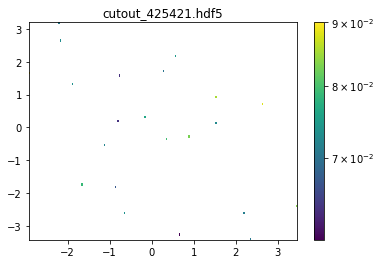

YZ-plane


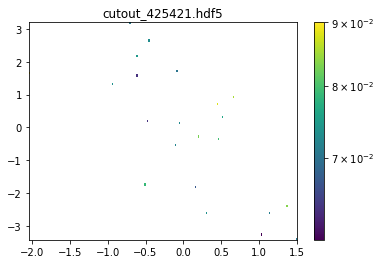

XY-plane


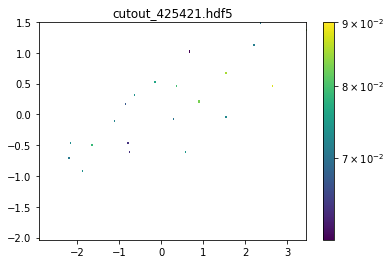

XZ-plane
------------------------Best cutout--------------------------


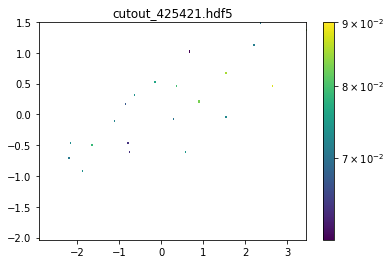

XZ-plane
0.060070902 0.090008795
[ 0.44061822 -0.12515616  0.88892716]
------------------------Best cutout--------------------------


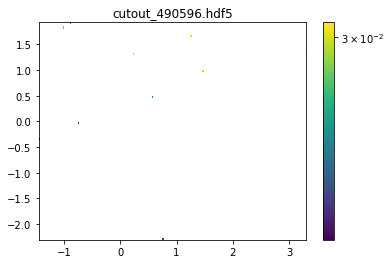

YZ-plane


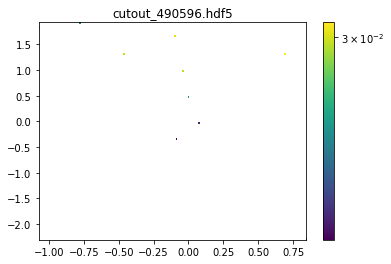

XY-plane


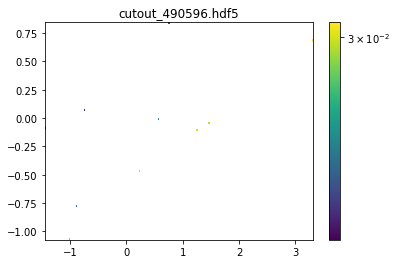

XZ-plane
------------------------Best cutout--------------------------


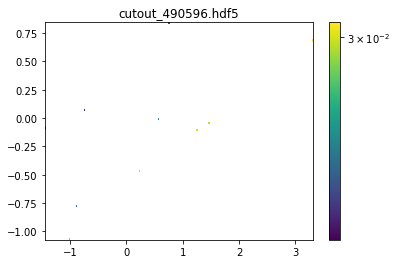

XZ-plane
0.022066226 0.03069218
[0.38966867 0.5120958  0.76545155]
------------------------Best cutout--------------------------


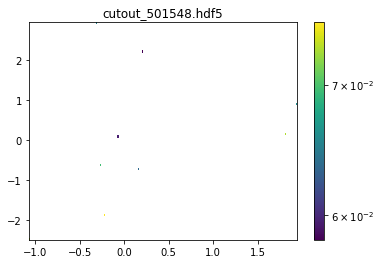

YZ-plane


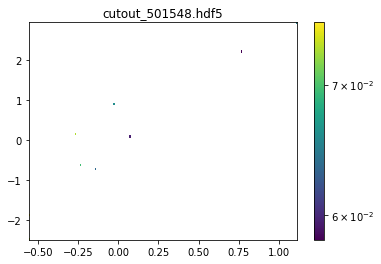

XY-plane


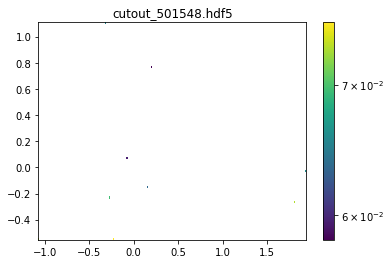

XZ-plane
------------------------Best cutout--------------------------


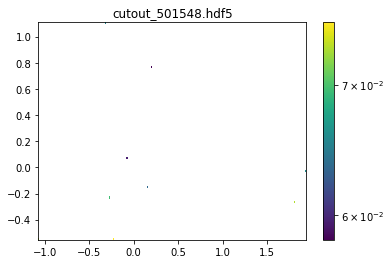

XZ-plane
0.058281947 0.075326286
[-0.32252234 -0.19855529  0.9255026 ]
------------------------Best cutout--------------------------


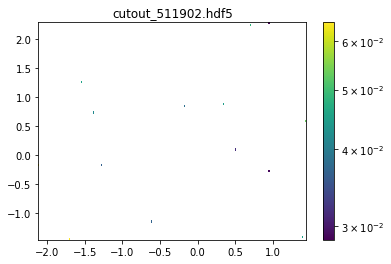

YZ-plane


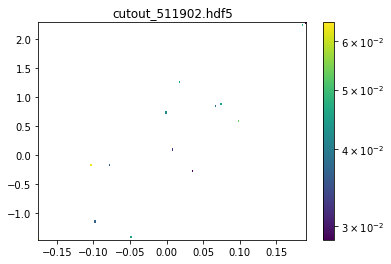

XY-plane


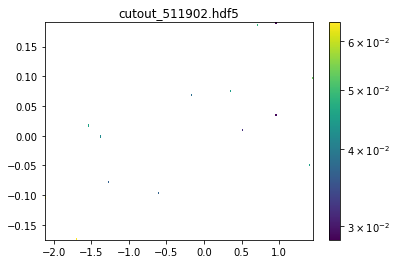

XZ-plane
------------------------Best cutout--------------------------


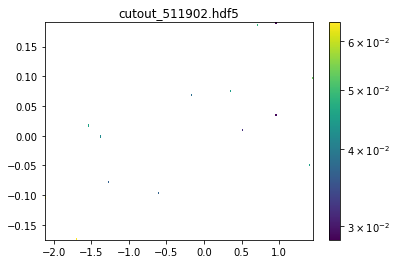

XZ-plane
0.028469257 0.06439204
[ 0.08660682  0.4548878  -0.88632745]
------------------------Best cutout--------------------------


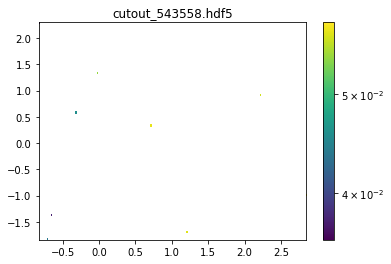

YZ-plane


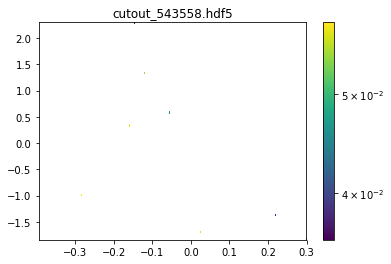

XY-plane


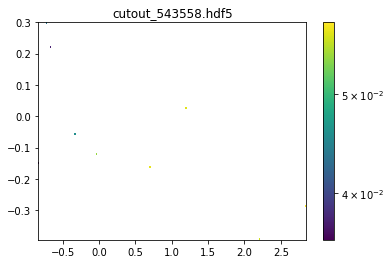

XZ-plane
------------------------Best cutout--------------------------


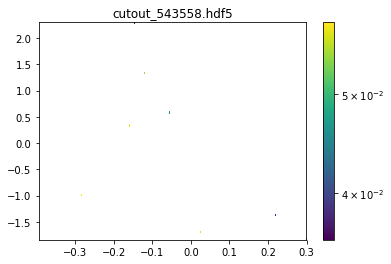

XY-plane
0.035975464 0.058759827
[-0.19232304 -0.77930486 -0.5964024 ]
------------------------Best cutout--------------------------


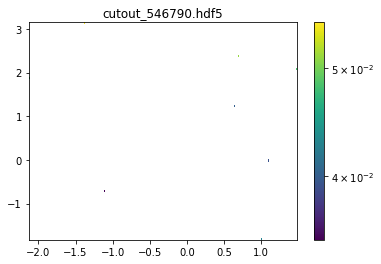

YZ-plane


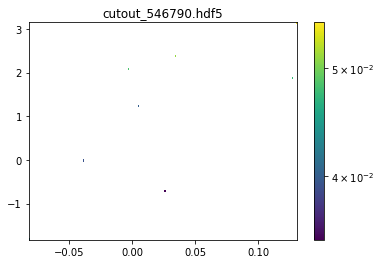

XY-plane


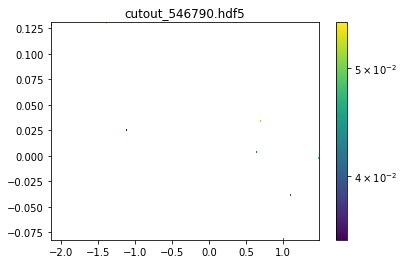

XZ-plane
------------------------Best cutout--------------------------


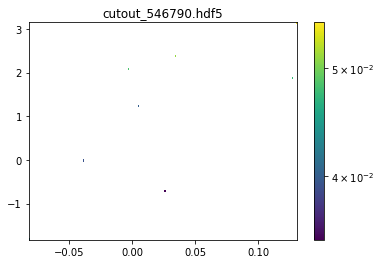

XY-plane
0.035097726 0.054984983
[-0.04490272 -0.84048426  0.53997225]
------------------------Best cutout--------------------------


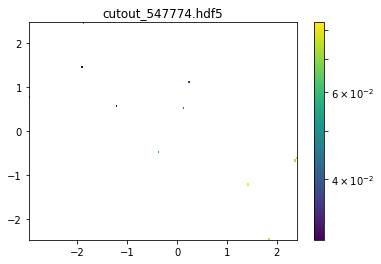

YZ-plane


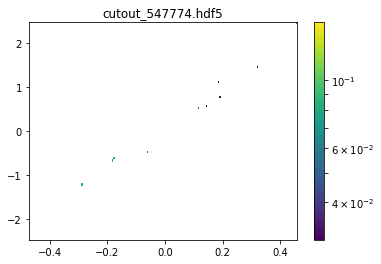

XY-plane


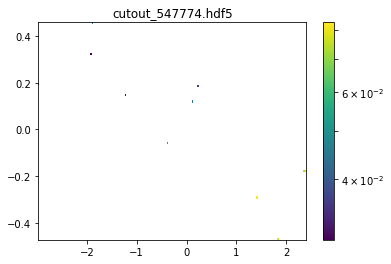

XZ-plane
------------------------Best cutout--------------------------


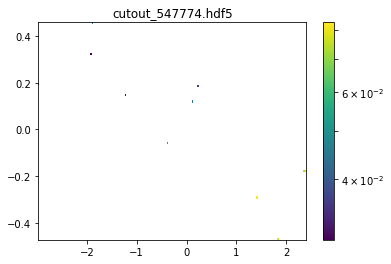

XZ-plane
0.030189577 0.08308829
[-0.17512561  0.03197891  0.9840267 ]
------------------------Best cutout--------------------------


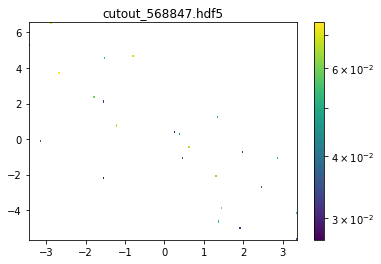

YZ-plane


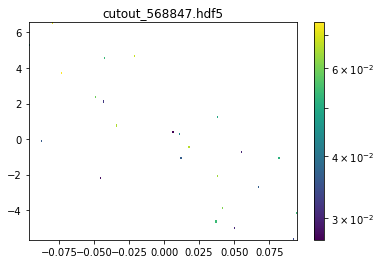

XY-plane


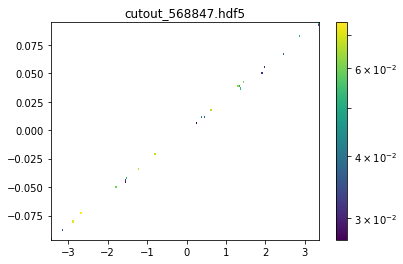

XZ-plane
------------------------Best cutout--------------------------


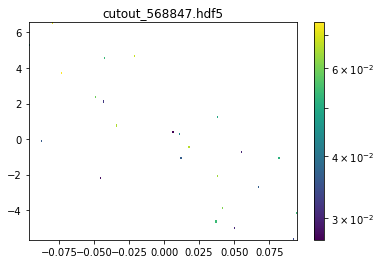

XY-plane
0.027145335 0.074263975
[ 0.02788872  0.9994969  -0.01510769]
------------------------Best cutout--------------------------


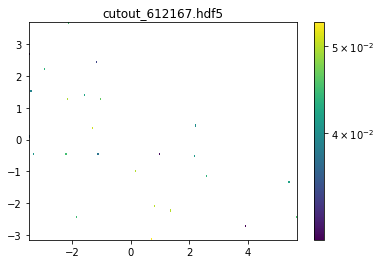

YZ-plane


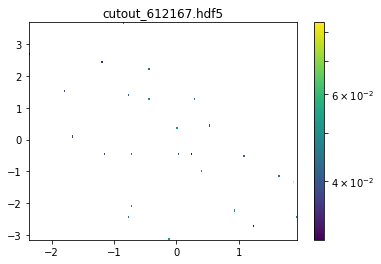

XY-plane


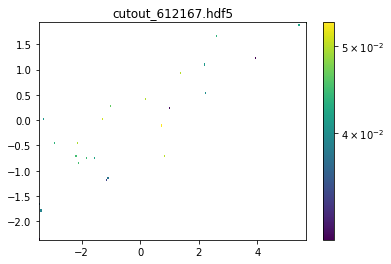

XZ-plane
------------------------Best cutout--------------------------


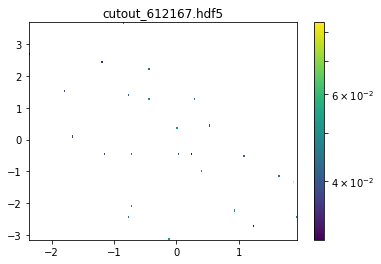

XY-plane
0.030407721 0.053192053
[ 0.6541271  -0.6695637   0.35185525]
------------------------Best cutout--------------------------


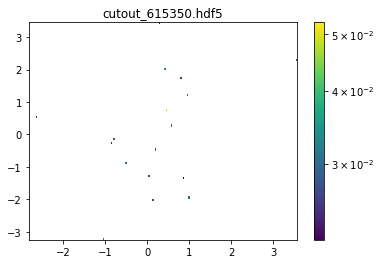

YZ-plane


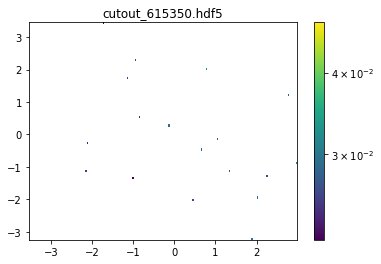

XY-plane


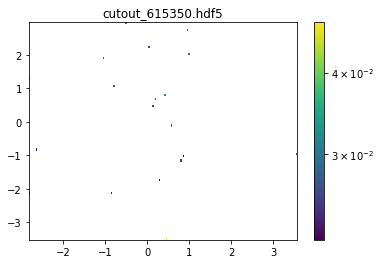

XZ-plane
------------------------Best cutout--------------------------


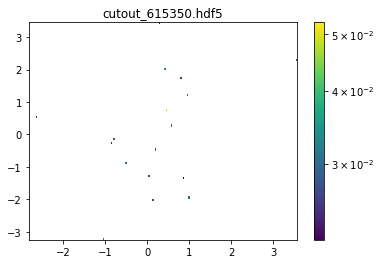

YZ-plane
0.022220999 0.03180676
[ 0.9053816   0.42024088 -0.06067674]
------------------------Best cutout--------------------------


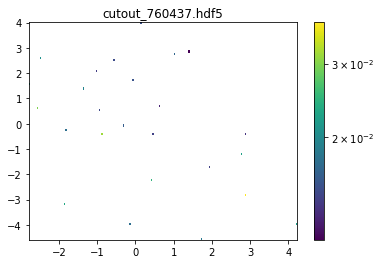

YZ-plane


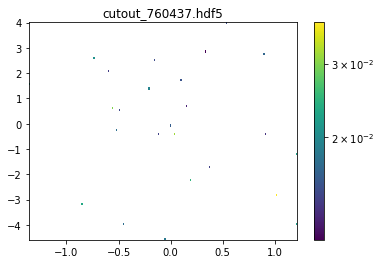

XY-plane


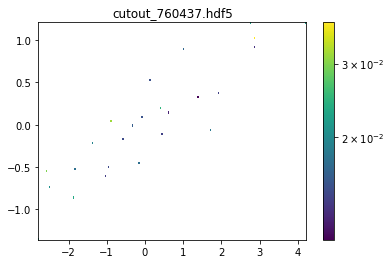

XZ-plane
------------------------Best cutout--------------------------


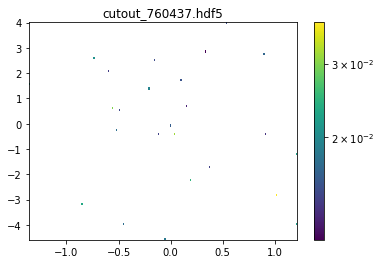

XY-plane
0.011379284 0.037640523
[ 0.36787274 -0.9054721  -0.21163633]
------------------------Best cutout--------------------------


In [10]:
# This loops over all of the galaxies that don't have nan values and plots the metallicity distribution for each

for i in entry:
    metallicity_plot('cutout_'+str(halo_ids[i])+'.hdf5',Lhat[i]) 

In [11]:
# This function obtains the mean metallicity in solar units for a given galaxy

def get_metallicity(halo_ids):
    f = []
    Z = []
    mean = []
    for i in halo_ids:
        f = h5py.File('/Users/sandyspicer/Desktop/RIT/Illustris-3/groups_135/illustris_api/dwarf/z=3/cutout_'+str(i)+'.hdf5', 'r')
        Z.append(f['PartType0']['GFM_Metallicity'][:]/0.0127)
    for j in range(0,len(Z)):
        mean.append(numpy.ndarray.mean(Z[j]))

    return mean

In [12]:
# This function obtains the total star formation rate in solar masses per year for a given galaxy

def get_SFR(halo_ids):
    f = []
    SFR = []
    mean = []
    total = []
    for i in halo_ids:
        f = h5py.File('/Users/sandyspicer/Desktop/RIT/Illustris-3/groups_135/illustris_api/dwarf/z=3/cutout_'+str(i)+'.hdf5', 'r')
        SFR.append(f['PartType0']['StarFormationRate'][:])
    for j in range(0,len(SFR)):
        mean.append(numpy.ndarray.mean(SFR[j]))
    for k in range(0,len(SFR)):
        total.append(numpy.ndarray.sum(SFR[k]))

    return total

In [13]:
metallicity = get_metallicity(halo_ids)
print(metallicity)

starformation = get_SFR(halo_ids)
print(starformation)

[0.022051018, 0.02197697, 0.04229257, 0.051826485, 0.022195915, 0.02717633, 0.08181023, 0.011738425, 0.0023317137, 0.009397346, 0.04444047, 0.012780705, 0.04705005, 0.08475538, 0.04214043, 0.2551856, 0.3224922, 0.005387259, 0.014354269, 0.12312339, 0.27277064, 0.1648891, 0.0421634, 0.007005852, 0.03387736, 0.03796964, 0.0320064, 0.014508661, 0.04536685, 0.0043882695, 0.03700068, 0.06732342, 0.16701052, 0.009103618, 0.025860142, 0.10305057, 0.07091381, 0.20833074, 0.018732207, 0.05505854, 0.03043212, 0.020312132, 0.037028387, 0.03571096, 0.024239745, 0.0142448805, 0.011345431, 0.008822752, 0.040027194, 0.11467395, 0.07461428, 0.039566584, 0.029229809, 0.0152067, 0.016237078, 0.037141968, 0.02680847, 0.020858921, 0.0671145, 0.043468438, 0.009392817, 0.012039617, 0.013591666, 0.035197508, 0.006361921, 0.04978771, 0.04493899, 0.05530909, 0.0021234986, 0.022334458, 0.04905334, 0.023924159, 0.0126513075, 0.04250947, 0.026514586, 0.027357385, 0.0052136458, 0.026197186, 0.05671903, 0.03120042,

In [14]:
# This creates a text file with information about all galaxies that passed the mass cuts

with open("master_dwarf_z=3.txt", "a") as myfile:
    for i in range(0,len(halo_ids)):
        ids = halo_ids[i],stellar_mass[i],fluid_mass[i],virial_mass[i],HI_abundance[i], HI[i], [Lhat[i][0],Lhat[i][1],Lhat[i][2]], metallicity[i], starformation[i]
        myfile.write(str(ids)+'\n')

In [15]:
metallicity = get_metallicity(halo_ids)
print(metallicity)

starformation = get_SFR(halo_ids)
print(starformation)

# This converts the stellar mass to units of solar masses
converted_stellar_mass = []
for i in stellar_mass:
    x = i*1e10*0.704
    converted_stellar_mass.append(x)

[0.022051018, 0.02197697, 0.04229257, 0.051826485, 0.022195915, 0.02717633, 0.08181023, 0.011738425, 0.0023317137, 0.009397346, 0.04444047, 0.012780705, 0.04705005, 0.08475538, 0.04214043, 0.2551856, 0.3224922, 0.005387259, 0.014354269, 0.12312339, 0.27277064, 0.1648891, 0.0421634, 0.007005852, 0.03387736, 0.03796964, 0.0320064, 0.014508661, 0.04536685, 0.0043882695, 0.03700068, 0.06732342, 0.16701052, 0.009103618, 0.025860142, 0.10305057, 0.07091381, 0.20833074, 0.018732207, 0.05505854, 0.03043212, 0.020312132, 0.037028387, 0.03571096, 0.024239745, 0.0142448805, 0.011345431, 0.008822752, 0.040027194, 0.11467395, 0.07461428, 0.039566584, 0.029229809, 0.0152067, 0.016237078, 0.037141968, 0.02680847, 0.020858921, 0.0671145, 0.043468438, 0.009392817, 0.012039617, 0.013591666, 0.035197508, 0.006361921, 0.04978771, 0.04493899, 0.05530909, 0.0021234986, 0.022334458, 0.04905334, 0.023924159, 0.0126513075, 0.04250947, 0.026514586, 0.027357385, 0.0052136458, 0.026197186, 0.05671903, 0.03120042,

In [16]:
# This is the array of information about all of the galaxies that met the mass cuts
# I had a hard time trying to read in information from the text file so I just copied and pasted the information into an array
# It isn't the best way of doing things, but it works
# Note that I am ignoring the galaxies with nan values of Lhat in my analysis

all_data = [['halo_ids', 'stellar_mass', 'fluid_mass', 'virial_mass', 'HI_abundance', 'HI', 'Lhat', 'metallicity', 'starformation'],
#(2171, 0.000172, 0.00053, 8.267938003242886, 0.65551305, 0.0003474219155311585, [nan, nan, nan], 0.022051018, 0.0013595436)
#(22690, 0.00013, 0.000966, 8.266370693164724, 0.6963881, 0.0006727109291553496, [nan, nan, nan], 0.02197697, 0.0007995356)
#(31000, 0.000103, 0.000862, 8.261972141736235, 0.4069048, 0.00035075192624330526, [nan, nan, nan], 0.04229257, 0.00074557605)
#(49283, 0.000171, 0.002149, 8.263084378415918, 0.7423268, 0.0015952602847218512, [nan, nan, nan], 0.051826485, 0.0010673968)
#(76688, 0.000147, 0.000366, 8.26160076228336, 0.6732543, 0.00024641107785701753, [nan, nan, nan], 0.022195915, 0.0013445658)
#(84138, 0.000113, 0.001244, 8.260315366040686, 0.637103, 0.0007925561583042145, [nan, nan, nan], 0.02717633, 0.0038945994)
#(156903, 0.000157, 0.001195, 8.260145951378151, 0.7662275, 0.0009156418430805207, [nan, nan, nan], 0.08181023, 0.0011171154)
#(159560, 0.000107, 0.000444, 8.262882365318903, 0.3022629, 0.00013420472860336304, [nan, nan, nan], 0.011738425, 0.002481957)
#(186089, 0.000107, 0.000867, 8.262275761613994, 0.68543446, 0.0005942716773748398, [nan, nan, nan], 0.0023317137, 0.0017387953)
#(191548, 0.000102, 0.000265, 8.27145216097267, 0.48360214, 0.00012815456613898276, [nan, nan, nan], 0.009397346, 0.0012698034)
#(210415, 0.000111, 0.001133, 8.271320066231509, 0.7211759, 0.0008170923049449921, [nan, nan, nan], 0.04444047, 0.0018768394)
[215261, 0.000152, 0.001331, 8.264562943539799, 0.39146027, 0.0005210336189568043, [-0.0010867226, 0.9820485, -0.1886253], 0.012780705, 0.004469657],
#(232811, 0.000124, 0.000245, 8.27151819327961, 0.2657981, 6.51205325126648e-05, [nan, nan, nan], 0.04705005, 0.0013804035)
#(237294, 0.000347, 0.000729, 8.265702033322238, 0.35560408, 0.00025923537603020667, [nan, nan, nan], 0.08475538, 0.0024860057)
[241464, 0.00036, 0.00123, 8.268137678870268, 0.7501423, 0.0009226749998331069, [-0.9579826, -0.012033771, -0.2865738], 0.04214043, 0.0016746086],
#(248255, 0.000229, 0.000389, 8.26513286188878, 0.27897575, 0.00010852156868577004, [nan, nan, nan], 0.2551856, 0.0021628034)
[253291, 0.000716, 9.3e-05, 8.271485178381125, 0.06759301, 6.286149770021438e-06, [-0.15626852, -0.9819593, -0.10647106], 0.3224922, 0.0006468419],
#(256201, 0.000107, 0.000555, 8.266604481102336, 0.78921854, 0.00043801629245281224, [nan, nan, nan], 0.005387259, 0.00044560168)
#(259486, 0.000134, 0.001548, 8.271220968802236, 0.7331596, 0.0011349310634136199, [nan, nan, nan], 0.014354269, 0.00065276504)
#(271879, 0.000164, 0.000431, 8.26436161719057, 0.6423121, 0.0002768365191817284, [nan, nan, nan], 0.12312339, 0.00094094593)
[284225, 0.000409, 0.000773, 8.269234256820232, 0.42190084, 0.00032612934824824343, [0.4414452, -0.15500912, 0.88379765], 0.27277064, 0.0037792998],
[286053, 0.000256, 0.000986, 8.271220968802236, 0.05818704, 5.73724228516221e-05, [-0.94526994, 0.1300963, -0.29923183], 0.1648891, 0.007612147],
#(294834, 0.000311, 0.000926, 8.271088803712384, 0.6123842, 0.0005670677692890167, [nan, nan, nan], 0.0421634, 0.0007607701)
#(300871, 0.000131, 0.000521, 8.266270459795376, 0.65191793, 0.00033964924383163454, [nan, nan, nan], 0.007005852, 0.0011746055)
#(301684, 0.000103, 0.001372, 8.264328053723501, 0.5304167, 0.0007277317495346069, [nan, nan, nan], 0.03387736, 0.003997669)
[303139, 0.000177, 0.000461, 8.26580239795279, 0.7806617, 0.0003598850446939468, [-0.60968083, 0.4506221, -0.6520959], 0.03796964, 0.00062889187],
#(303152, 0.000112, 0.000871, 8.26257916937616, 0.6300213, 0.0005487485297322273, [nan, nan, nan], 0.0320064, 0.0028373823)
#(309419, 0.00012, 0.001736, 8.262309484056988, 0.7446469, 0.0012927070302963257, [nan, nan, nan], 0.014508661, 0.002953397)
#(316328, 0.000172, 0.000926, 8.266470903405965, 0.7351948, 0.0006807903869152068, [nan, nan, nan], 0.04536685, 0.00074749335)
#(324719, 0.000113, 0.000818, 8.26082321386535, 0.75429696, 0.0006170149120092392, [nan, nan, nan], 0.0043882695, 0.0005693689)
#(328932, 0.000167, 0.001982, 8.272046090610463, 0.7637342, 0.0015137212269306184, [nan, nan, nan], 0.03700068, 0.0016340337)
#(328976, 0.000103, 0.001065, 8.268769380046228, 0.68642324, 0.0007310407528281212, [nan, nan, nan], 0.06732342, 0.0013479069)
[333849, 0.000106, 0.000488, 8.264328053723501, 0.22692412, 0.00011073897123336792, [-0.78786093, -0.06762992, -0.61212856], 0.16701052, 0.0029648773],
[340318, 0.000215, 0.001457, 8.270890480633254, 0.72607774, 0.0010578952605128289, [-0.06848208, 0.9855233, -0.1550936], 0.009103618, 0.0024998055],
#(359148, 0.000114, 0.003194, 8.26663786910788, 0.76364917, 0.002439095435023308, [nan, nan, nan], 0.025860142, 0.0011038375)
[365203, 0.00033, 0.000411, 8.269201067833787, 0.5572991, 0.0002290499208569527, [-0.3439513, -0.9388589, 0.015539601], 0.10305057, 0.0018421931],
#(368865, 0.000121, 0.000834, 8.26166830944609, 0.4947658, 0.0004126346674561501, [nan, nan, nan], 0.07091381, 0.0026125694)
#(374409, 0.000228, 0.000984, 8.270228748855216, 0.7388208, 0.0007269996585845947, [nan, nan, nan], 0.20833074, 0.001627672)
#(383010, 0.000113, 0.000991, 8.26663786910788, 0.82662404, 0.0008191844195127487, [nan, nan, nan], 0.018732207, 0.00037101388)
#(383219, 0.000104, 0.001125, 8.270791285121328, 0.54547924, 0.0006136641427874564, [nan, nan, nan], 0.05505854, 0.0040095034)
[385452, 0.000248, 0.001215, 8.263925089665918, 0.7836185, 0.0009520964893698692, [0.0027054627, 0.93465555, 0.35554424], 0.03043212, 0.00058663386],
#(386612, 0.000154, 0.00258, 8.262140845650839, 0.6428639, 0.0016585889375209807, [nan, nan, nan], 0.020312132, 0.0034770921)
#(391429, 0.000103, 0.000118, 8.266604481102336, 0.7063463, 8.334886026382447e-05, [nan, nan, nan], 0.037028387, 0.00028084975)
[403223, 0.000131, 0.000469, 8.264529395628779, 0.68022996, 0.0003190278521180153, [-0.49816936, 0.86702967, -0.009322925], 0.03571096, 0.0011409593],
#(406177, 0.000196, 0.003224, 8.270328072922407, 0.73935056, 0.0023836661968231203, [nan, nan, nan], 0.024239745, 0.0042999485)
#(407741, 0.000123, 0.000475, 8.264428736344076, 0.7688983, 0.00036522669643163677, [nan, nan, nan], 0.0142448805, 0.0005080569)
#(409786, 0.000137, 0.000675, 8.271584215548193, 0.67706394, 0.00045701816082000733, [nan, nan, nan], 0.011345431, 0.0018740443)
#(412403, 0.000101, 0.0024, 8.269101485653835, 0.7383599, 0.001772063827514648, [nan, nan, nan], 0.008822752, 0.0010927236)
#(414420, 0.000114, 0.000177, 8.268935464595234, 0.66433287, 0.0001175869174003601, [nan, nan, nan], 0.040027194, 0.00039141552)
[419138, 0.000227, 0.001698, 8.264630031588423, 0.74407166, 0.0012634336827993394, [0.67010546, -0.46074912, -0.58195263], 0.11467395, 0.0025706918],
[425421, 0.000369, 0.002521, 8.267371756570473, 0.6493806, 0.0016370885538458822, [0.44061822, -0.12515616, 0.88892716], 0.07461428, 0.0051604086],
#(436520, 0.000108, 0.000824, 8.26082321386535, 0.479703, 0.0003952752795219421, [nan, nan, nan], 0.039566584, 0.0033780183)
#(436867, 0.000117, 0.000218, 8.270394276349656, 0.68255126, 0.0001487961757183075, [nan, nan, nan], 0.029229809, 0.000582793)
#(439635, 0.000296, 0.000956, 8.271551205668505, 0.681457, 0.0006514728758335112, [nan, nan, nan], 0.0152067, 0.0023820691)
#(442717, 0.000147, 0.00159, 8.273001272063738, 0.7391295, 0.0011752158790826798, [nan, nan, nan], 0.016237078, 0.0015920507)
#(461016, 0.000111, 0.001045, 8.268370517796942, 0.67953163, 0.0007101105573773384, [nan, nan, nan], 0.037141968, 0.0004477997)
[490596, 0.000125, 0.000928, 8.26493179962505, 0.79405487, 0.000736882915496826, [0.38966867, 0.5120958, 0.76545155], 0.02680847, 0.00073500257],
#(494949, 0.000103, 0.001944, 8.268669698821222, 0.68450457, 0.001330676881313324, [nan, nan, nan], 0.020858921, 0.0015412515)
[501548, 0.000235, 0.00096, 8.269698636513652, 0.6454709, 0.0006196520805358887, [-0.32252234, -0.19855529, 0.9255026], 0.0671145, 0.0021106203],
[511902, 0.000333, 0.001575, 8.264025865738281, 0.67679113, 0.0010659460321068763, [0.086606815, 0.4548878, -0.88632745], 0.043468438, 0.003394886],
#(514058, 0.000121, 0.00176, 8.263118038131642, 0.6354231, 0.0011183446979522707, [nan, nan, nan], 0.009392817, 0.0021478802)
#(522284, 0.000141, 0.002332, 8.268204217016851, 0.747529, 0.0017432375586032868, [nan, nan, nan], 0.012039617, 0.0016968491)
#(530873, 0.000139, 0.001147, 8.272705061197257, 0.7357097, 0.0008438590566515922, [nan, nan, nan], 0.013591666, 0.00069711625)
#(537796, 0.000182, 0.000897, 8.265835847676064, 0.7773398, 0.0006972738150358201, [nan, nan, nan], 0.035197508, 0.0005867696)
#(541093, 0.000128, 0.000689, 8.271749227321864, 0.7417281, 0.0005110506795048713, [nan, nan, nan], 0.006361921, 0.0007171946)
[543558, 0.000198, 0.000992, 8.269499677443866, 0.7937336, 0.0007873837280273438, [-0.19232304, -0.77930486, -0.5964024], 0.04978771, 0.0005440075],
[546790, 0.000276, 0.000809, 8.266003057658455, 0.7876864, 0.0006372383037209511, [-0.04490272, -0.84048426, 0.53997225], 0.04493899, 0.0005690174],
[547774, 0.000182, 0.001337, 8.26580239795279, 0.7059705, 0.0009438825929164887, [-0.17512561, 0.03197891, 0.9840267], 0.05530909, 0.0022700944],
#(564510, 0.000137, 0.003278, 8.270162520188384, 0.7112528, 0.0023314867064952853, [nan, nan, nan], 0.0021234986, 0.00045929098)
#(566957, 0.000111, 0.001422, 8.266237043530833, 0.78189796, 0.0011118589020967483, [nan, nan, nan], 0.022334458, 0.0012142991)
[568847, 0.000127, 0.002761, 8.267305090750723, 0.66577363, 0.0018382009928226473, [0.02788872, 0.9994969, -0.01510769], 0.04905334, 0.00042167908],
#(589434, 0.000229, 0.000848, 8.265735490776274, 0.692922, 0.0005875978527069092, [nan, nan, nan], 0.023924159, 0.0019531097)
#(600849, 0.000107, 0.002291, 8.265702033322238, 0.73486364, 0.0016835725966691968, [nan, nan, nan], 0.0126513075, 0.0005836311)
[612167, 0.000253, 0.002717, 8.270030032547972, 0.69378185, 0.0018850052938461303, [0.6541271, -0.6695637, 0.35185525], 0.04250947, 0.0030293325],
[615350, 0.000196, 0.002212, 8.266003057658455, 0.69801044, 0.0015439991035461425, [0.9053816, 0.42024088, -0.06067674], 0.026514586, 0.0011956979],
#(617512, 0.000196, 0.001807, 8.267238414695951, 0.6752245, 0.0012201306408047676, [nan, nan, nan], 0.027357385, 0.0051296195)
#(654402, 0.000129, 0.000773, 8.259840838346037, 0.65923345, 0.0005095874575376511, [nan, nan, nan], 0.0052136458, 0.0020713306)
#(655755, 0.000173, 0.0025, 8.260078167004375, 0.65733844, 0.0016433461010456085, [nan, nan, nan], 0.026197186, 0.0019047307)
#(660071, 0.000109, 0.000675, 8.270658989184914, 0.64949554, 0.00043840949088335036, [nan, nan, nan], 0.05671903, 0.00029575403)
#(661563, 0.000207, 0.001787, 8.26690488078669, 0.65397066, 0.0011686455672383308, [nan, nan, nan], 0.03120042, 0.002757325)
#(664474, 0.00013, 0.001844, 8.266237043530833, 0.75037074, 0.0013836836462020874, [nan, nan, nan], 0.0014878246, 0.0010032565)
#(689390, 0.000123, 0.002587, 8.261330468525202, 0.76368797, 0.0019756607738733293, [nan, nan, nan], 0.006458556, 0.0016813569)
#(704225, 0.000144, 0.000318, 8.259874750381497, 0.713465, 0.00022688186216354367, [nan, nan, nan], 0.0071810293, 0.00040208342)
#(749541, 0.000119, 0.002896, 8.271551205668505, 0.70967716, 0.0020552250547409058, [nan, nan, nan], 0.014787226, 0.0020580674)
[760437, 0.000203, 0.0029, 8.259739086348562, 0.63683367, 0.0018468176364898681, [0.36787274, -0.9054721, -0.21163633], 0.019301437, 0.0016342339]]
#(765984, 0.000198, 0.002292, 8.268736155513304, 0.72081554, 0.0016521092162132265, [nan, nan, nan], 0.024019908, 0.0007812991)
#(789178, 0.000116, 0.001988, 8.270559740778792, 0.57372594, 0.0011405671663284303, [nan, nan, nan], 0.01172968, 0.0012763785)
#(800546, 0.000257, 0.000242, 8.261127637752352, 0.4298864, 0.00010403250896930694, [nan, nan, nan], 0.020947842, 0.0012174121)
#(804297, 0.000159, 0.003129, 8.265969620811852, 0.67453694, 0.002110626096010208, [nan, nan, nan], 0.02340347, 0.00036935657)
#(818914, 0.000106, 0.001388, 8.264965316467196, 0.7367646, 0.001022629278421402, [nan, nan, nan], 0.023264319, 0.0005069689)
#(925757, 0.000107, 0.00178, 8.263319941660106, 0.59582317, 0.0010605652403831481, [nan, nan, nan], 0.009917936, 0.00091061636)


In [17]:
Z_dwarf = []
stellarmass = []
hi_mass = []

# This reads in information from the array above and stores the data in smaller arrays

for i in range(1,len(all_data)):
    Z_dwarf.append(all_data[i][7])
    stellarmass.append(all_data[i][1])
    hi_mass.append(all_data[i][5])
    
    
print('There are '+str(len(Z_dwarf))+' galaxies downloaded')
    
print('The mean metallicity is: '+str(numpy.mean(Z_dwarf)))


# This finds the percentage of galaxies that have metallicities below 0.3 solar and stores their index values into an array called entry1
Z_cut = []
stellarmasscut = []
entry1 = []
for i in range(0,len(Z_dwarf)):
    if Z_dwarf[i]<=0.3:
        Z_cut.append(Z_dwarf[i])
        entry1.append(i)
        percentage = len(Z_cut)/len(Z_dwarf)
        
# This appends stellar mass values for galaxies that have metallicities below 0.3 solar to an array
for j in entry1:
    stellarmasscut.append(stellarmass[j])
    
        
print(Z_cut) 
print('')
print('Out of '+str(len(Z_dwarf))+' galaxies, '+str(len(Z_cut))+ ' have a metallicity below 0.3 solar')
print('')
print('This is ' +str(percentage * 100)+'% of the population')

There are 23 galaxies downloaded
The mean metallicity is: 0.07880194626086955
[0.012780705, 0.04214043, 0.27277064, 0.1648891, 0.03796964, 0.16701052, 0.009103618, 0.10305057, 0.03043212, 0.03571096, 0.11467395, 0.07461428, 0.02680847, 0.0671145, 0.043468438, 0.04978771, 0.04493899, 0.05530909, 0.04905334, 0.04250947, 0.026514586, 0.019301437]

Out of 23 galaxies, 22 have a metallicity below 0.3 solar

This is 95.65217391304348% of the population


Text(0,0.5,'Metallicity (Solar Units)')

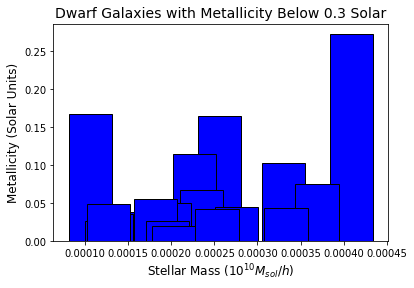

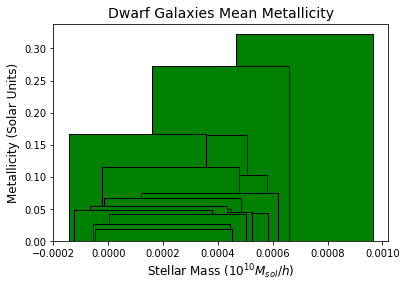

In [18]:
# This plots bar graphs of the stellar mass values that correspond to certain metallicities

plt.figure(1)
plt.bar(stellarmasscut,Z_cut,0.00005,color='blue',edgecolor='black')
plt.title('Dwarf Galaxies with Metallicity Below 0.3 Solar',fontsize=14)
plt.xlabel(r'Stellar Mass ($10^{10} M_{sol}/h$)',fontsize = 12)
plt.ylabel('Metallicity (Solar Units)',fontsize = 12)

plt.figure(2)
plt.bar(stellarmass,Z_dwarf,0.0005,color='green',edgecolor='black')
plt.title('Dwarf Galaxies Mean Metallicity',fontsize=14)
plt.xlabel(r'Stellar Mass ($10^{10} M_{sol}/h$)',fontsize = 12)
plt.ylabel('Metallicity (Solar Units)',fontsize = 12)

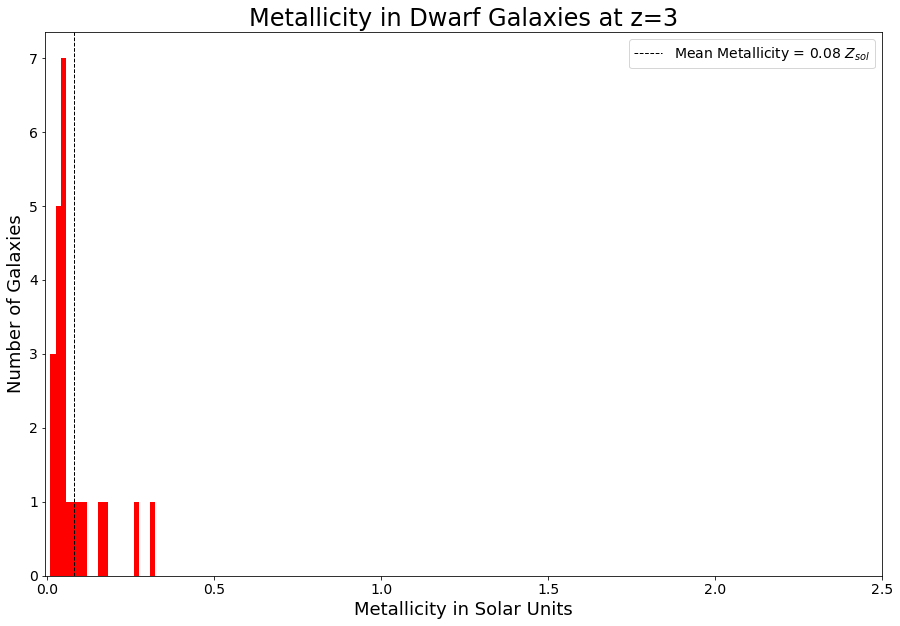

In [20]:
# This plots the metallicity in dwarf galaxies for all of the galaxies at a given redshift

plt.figure(figsize=(15,10))
plt.hist(Z_dwarf,color='red',bins=20)
plt.title('Metallicity in Dwarf Galaxies at z=3',fontsize = 24)
plt.xlabel('Metallicity in Solar Units',fontsize=18)
plt.xticks(numpy.arange(0,3,0.5),fontsize=14)
plt.axvline(x=0.07880194626086955,linewidth=1, color='k', linestyle='--',label='Mean Metallicity = 0.08 $Z_{sol}$')
plt.yticks(fontsize=14)
#plt.xlim(xmin=0,xmax=1)
plt.ylabel('Number of Galaxies',fontsize=18)
plt.legend(fontsize=14)

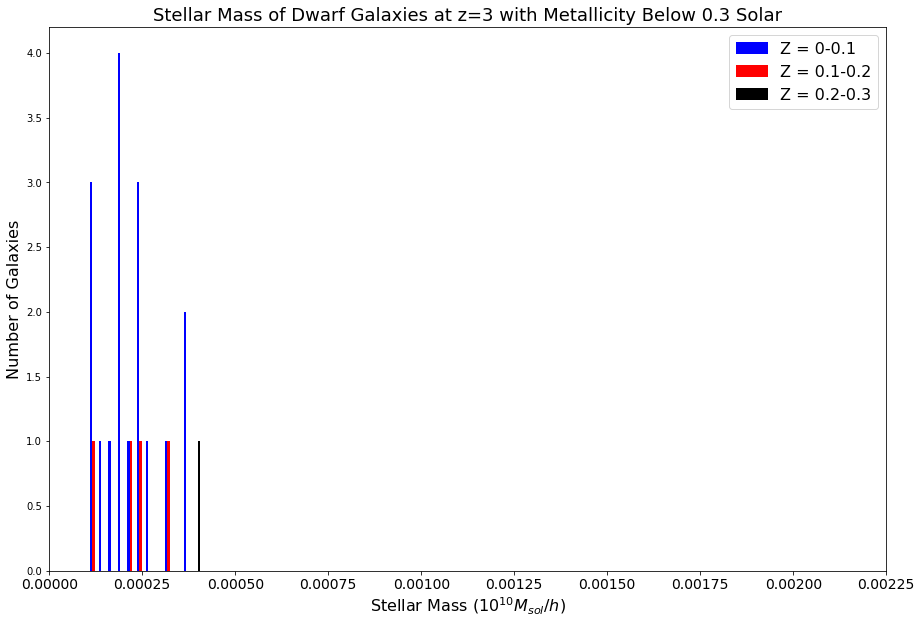

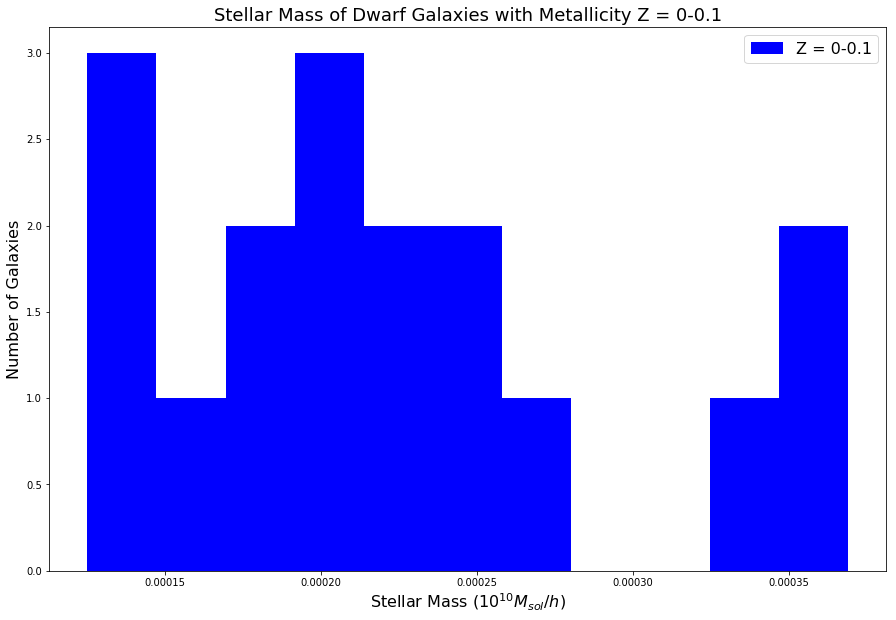

In [21]:
# This plots histograms of the stellar mass values that correspond to metallicity values below 0.3 solar

Z_0_1 = []
Z_1_2 = []
Z_2_3 = []
entry01 = []
entry12 = []
entry23 = []


# This loops over the metallicities and creates arrays with certain metallicity ranges
# It also stores the index values in separate arrays
# EX: Z_0_1 means metallicities with values of 0-0.1 solar
for i in range(0,len(Z_dwarf)):
    if Z_dwarf[i]>=0 and Z_dwarf[i]<=0.1:
        Z_0_1.append(Z_dwarf[i])
        entry01.append(i)
    if Z_dwarf[i]>=0.1 and Z_dwarf[i]<=0.2:
        Z_1_2.append(Z_dwarf[i])
        entry12.append(i)
    if Z_dwarf[i]>=0.2 and Z_dwarf[i]<=0.3:
        Z_2_3.append(Z_dwarf[i])
        entry23.append(i)
        
        
stellarmass01 = []
stellarmass12 = []
stellarmass23 = []

# This appends stellar mass values that correpond to the metallicity ranges
for j in entry01:
    stellarmass01.append(stellarmass[j])
for k in entry12:
    stellarmass12.append(stellarmass[k])
for l in entry23:
    stellarmass23.append(stellarmass[l])
    

colors = ['blue', 'red', 'black']
names = ['Z = 0-0.1', 'Z = 0.1-0.2', 'Z = 0.2-0.3']

# This plots all three metallicity ranges
   
plt.figure(figsize=(15,10))
plt.hist([stellarmass01, stellarmass12, stellarmass23], bins = 12, color = colors, label=names)
plt.xticks(numpy.arange(0,0.0025,0.00025),fontsize=14)
#plt.yticks(numpy.arange(0,10,1),fontsize=14)
plt.title('Stellar Mass of Dwarf Galaxies at z=3 with Metallicity Below 0.3 Solar',fontsize=18)
plt.xlabel(r'Stellar Mass ($10^{10} M_{sol}/h$)',fontsize = 16)
plt.ylabel('Number of Galaxies',fontsize = 16)
plt.legend(prop={'size': 16})


# This plots metallicity ranges from 0-0.1 solar 

plt.figure(figsize=(15,10))
plt.hist(stellarmass01, bins = 11, color = colors[0], label=names[0])
#plt.xticks(numpy.arange(0,0.1,0.025),fontsize=14)
#plt.yticks(numpy.arange(0,6,1),fontsize=14)
plt.title('Stellar Mass of Dwarf Galaxies with Metallicity Z = 0-0.1',fontsize=18)
plt.xlabel(r'Stellar Mass ($10^{10} M_{sol}/h$)',fontsize = 16)
plt.ylabel('Number of Galaxies',fontsize = 16)
plt.legend(prop={'size': 16})

# This plots metallicity ranges form 0.1-0.2 solar

# plt.figure(figsize=(15,10))
# plt.hist(stellarmass12, bins = 7, color = colors[1], label=names[1])
# #plt.xticks(numpy.arange(0.1,0.2,0.025),fontsize=14)
# #plt.yticks(numpy.arange(0,10,1),fontsize=14)
# plt.title('Stellar Mass of Dwarf Galaxies with Metallicity Z = 0.1-0.2',fontsize=18)
# plt.xlabel(r'Stellar Mass ($10^{10} M_{sol}/h$)',fontsize = 16)
# plt.ylabel('Number of Galaxies',fontsize = 16)
# plt.legend(prop={'size': 16})

# This plots metallicity ranges from 0.2-0.3 solar

# plt.figure(figsize=(15,10))
# plt.hist(stellarmass23, bins = 9, color = colors[2], label=names[2])
# #plt.xticks(numpy.arange(0.2,0.3,0.025),fontsize=14)
# #plt.yticks(numpy.arange(0,8,1),fontsize=14)
# plt.title('Stellar Mass of Dwarf Galaxies with Metallicity Z = 0.2-0.3',fontsize=18)
# plt.xlabel(r'Stellar Mass ($10^{10} M_{sol}/h$)',fontsize = 16)
# plt.ylabel('Number of Galaxies',fontsize = 16)
# plt.legend(prop={'size': 16})

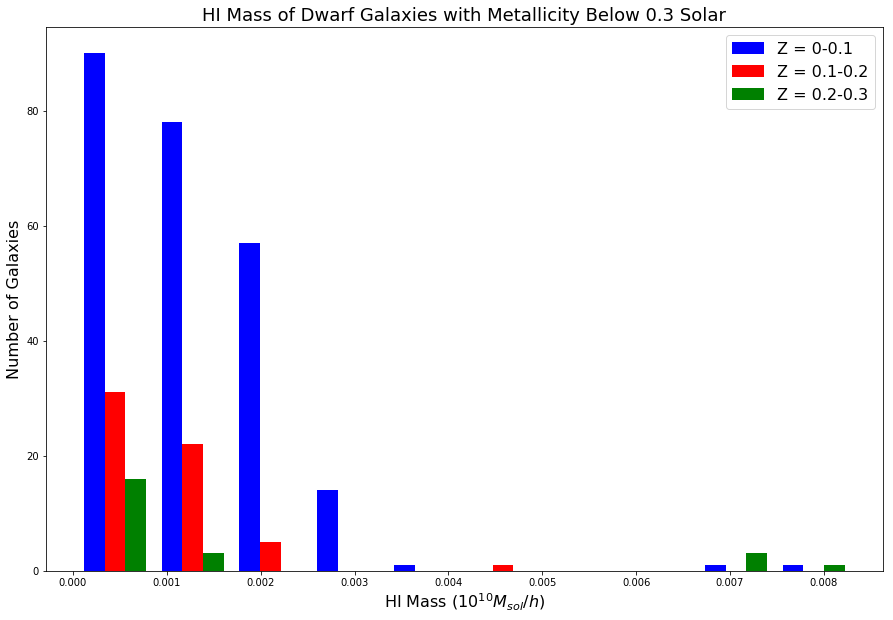

In [352]:
# This plots the HI masses for galaxies that have metallicity values below 0.3 solar

adjusted_HI_mass = []
for i in entry:
    adjusted_HI_mass.append(hi_mass[i])

HImass01 = []
HImass12 = []
HImass23 = []


for j in entry01:
    HImass01.append(hi_mass[j])
for k in entry12:
    HImass12.append(hi_mass[k])
for l in entry23:
    HImass23.append(hi_mass[l])

#print(HImass01)
colors = ['blue', 'red', 'green']
names = ['Z = 0-0.1', 'Z = 0.1-0.2', 'Z = 0.2-0.3']
   
plt.figure(figsize=(15,10))
plt.hist([HImass01, HImass12, HImass23], bins = 10, color = colors, label=names)
#plt.xticks(numpy.arange(0,0.35,0.025),fontsize=14)
plt.title('HI Mass of Dwarf Galaxies with Metallicity Below 0.3 Solar',fontsize=18)
plt.xlabel(r'HI Mass ($10^{10} M_{sol}/h$)',fontsize = 16)
plt.ylabel('Number of Galaxies',fontsize = 16)
plt.legend(prop={'size': 16})

In [22]:
# These functions are taken from master.py script
# The only change made is the value of h to equal 0.704

def phistar(z) :
    phi0 = 0.0035
    phi1 = -2.2
    return phi0*(1+z)**phi1

def fracM(M, z) :
    M0 = 11.16
    M1 = 0.17
    M2 = -0.07

    hatM = 1e1**(M0 + M1*z + M2*z*z)
    return M/hatM

def phi(M,z=0.) :
    alpha0 = -1.18
    alpha1 = -0.082
    alpha = alpha0 + alpha1*z
    return math.log(10.) * phistar(z)*fracM(M,z)**(1.+alpha) * numpy.exp( -fracM(M,z))

def PanterZ(lgMstar) :

    logMc = 9.66
    Delta = 1.04
    A = -0.452
    B = 0.572
    out = numpy.tanh((lgMstar - logMc)/Delta)
    arg = A + B*out
    return 10**arg

def lamfit(Ptless,Zint):
# will return interpolated fit for lambda (fitting to O17 and Lamberts et al. 2016) given Z_HI or Z_dwarf (Zint) -- 
    Z = numpy.arange(0.001,1.,0.01)
    a = 3.9007870e-09
    b = 1.4792985e-07
    lamfit = a*((1./Z)**3) +b
    lamfit = lamfit/Ptless
    int = numpy.interp(Zint,Z,lamfit)
    ## now impose floor:
    lamint = numpy.minimum(int,1.5e-4*1.e1)
    print ("lamint=" + str(lamint))
    return lamint

def Richlambda(Zint):
# will read in file form Richard and return interpolated lambda values at Zint    
    #filename = "dat_lambda_factor.txt"  # old file don't use                     
    filename = "dat_lambda_M40cut.txt" # should have mass cut > 40 Msun           
    #filename = "dat_lambda.txt" # new file but doesn't have mass cut      

    data = loadtxt(filename,
              dtype=([('Z', 'float'), ('lambda', 'float'), ('av_mc', 'float'), ('V', 'float')]))

    lam = data["lambda"]/1.e-3
    Z = data["Z"]/0.0134

    lamint = numpy.interp(Zint,Z,lam)
    print ("lamint=" + str(lamint))
    return lamint

def TremontiZ(lgMstar, corr = 0.):
    lgZ = -1.492 + 1.847*lgMstar - 0.08026*(lgMstar**2) - 8.69 +corr
    return 10**lgZ

def AM13Z(lgMstar,OHasym,Mto,gamma):
    Mstar = 10**lgMstar
    lgZ = OHasym - numpy.log10(1.+(Mto/Mstar)**gamma) - 8.69
    return 10**lgZ

def LeeZ(lgMstar):
    lgZ = 5.65 + 0.298*lgMstar - 8.66
    return 10**lgZ

def mratedwarfZLee(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZLee,dlgM,Mhdwarf,Phi_dwarf):
    #lmbda = lamfit(Ptless,Zdwarf)
    lmbda = Richlambda(Zdwarf)
    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)                                          
    return (Zdwarf*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum()


def mratedwarfZP(Mstar,SFRdwarf,Zdwarf,Ptless,dt,Zp,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,Zp) # leads to weird plot
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)
    return (Zdwarf*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum()

def mratedwarfZAM13(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZAM13,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,ZAM13)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)
    return (Zdwarf*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum()

def mratedwarfZTrem(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZTrem,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,ZTrem)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)
    return (Zdwarf*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum()

def mratedwarfZdwarf(Mstar,SFRdwarf,Zdwarf,Ptless,dt,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,Zdwarf)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)
    return (Zdwarf*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum(), lmbda

def detectrdwarfZp(Mstar,SFRdwarf,Zdwarf,Ptless,dt,Zp,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,Zp)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/Zp)*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf)

def detectrdwarfZdwarf(Mstar,SFRdwarf,Zdwarf,Ptless,dt,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,Zdwarf)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/Zdwarf)*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf)

def detectrdwarfZAm13(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZAM13,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,ZAM13)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/ZAM13)*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf)

def detectrdwarfZTrem(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZTrem,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,ZTrem)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/ZTrem)*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf)

def detectrdwarfZLee(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZLee,dlgM,Mhdwarf,Phi_dwarf) :
#    lmbda = lamfit(Ptless,ZLee)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/ZLee)*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf)


In [23]:
####--------Set parameters and return merger rate, detection rate, and plots --------

ZHI = 0.35
print ("Z_HI=" + str(ZHI))

M51 = 3.98e10  ## from Leroy et al. 2008                                        

SFRM51 = 0.1 ## Bigiel et al. 2010, C11
ZM51 = 0.1  # C11
dt = 10.e9  # Bigiel et al. 2010 - depletion time
                                                 
Ptless = 1.e-3  # the fraction of black holes that merge within Hubble time

dlgM = 0.1
lgMstar = numpy.arange(5, 9.89, dlgM)
Mstar =1e1**lgMstar

Phi_dwarf = phi(Mstar,z=0)
print(Phi_dwarf)
ZTrem = TremontiZ(lgMstar,corr=-0.26)
ZPanter = PanterZ(lgMstar)
ZLee = LeeZ(lgMstar)

## from Andrews & Martini 2013:
#Mto = 10**32.65
#OHasym = 16.988
#gamma = 0.373
### first row for MZR in Table 4:
#Mto = 10**8.901
#OHasym = 8.798
#gamma = 0.64
### second row:
Mto = 8.253
OHasym = 8.726
gamma = 0.734
ZAM13 = AM13Z(lgMstar,OHasym,Mto,gamma)

###----------dwarf galaxy parameters ---------------

print ("------dwarfs---------")

Mhdwarf = 2.5e8  ## from O17 h516
SFRdwarf = 0.01
Zdwarf = 0.1
## the bigger one h603
# Mhdwarf = 7.8e9
# SFRdwarf = 1.
# Zdwarf = 0.4

Z_HI=0.35
[0.1035341  0.09933067 0.09529788 0.09142882 0.08771684 0.08415555
 0.08073885 0.07746084 0.07431592 0.07129866 0.06840388 0.06562661
 0.06296207 0.06040567 0.05795304 0.05559993 0.0533423  0.05117628
 0.04909811 0.04710423 0.04519118 0.04335567 0.04159452 0.03990468
 0.0382832  0.03672728 0.03523418 0.03380128 0.03242606 0.03110606
 0.02983893 0.02862236 0.02745412 0.02633202 0.02525393 0.02421774
 0.02322136 0.0222627  0.02133968 0.02045018 0.01959202 0.01876295
 0.01796064 0.0171826  0.01642618 0.01568854 0.01496657 0.0142569
 0.01355583]
------dwarfs---------


In [24]:
# Obtaining all needed information from all_data array

StellarMass = []
converted_stellar_mass = []
HImass = []
VirialMass = []
Metallicity = []
StarFormation= []
HaloID = []
LHAT = []

for i in range(1,len(all_data)):
    StellarMass.append(all_data[i][1])
    converted_stellar_mass.append(all_data[i][1]*1e10*0.704)
    HImass.append(all_data[i][5])
    VirialMass.append(all_data[i][3])
    Metallicity.append(all_data[i][7])
    StarFormation.append(all_data[i][8])
    HaloID.append(all_data[i][0])
    LHAT.append(all_data[i][6])

In [25]:
# This loops over all galaxies in the all_data array and calculates the merger rates and detection rates below
# It stores the merger rate and detection rate of Zdwarf as well as lambda into an array

MRATEDDWARFZDWARF = []
DRATEDDWARFZDWARF = []
LAMBDA = []

for i in range(0,len(Metallicity)):
    
    print('---------------------------------HALO  '+str(HaloID[i])+'----------------------------------------')

    MratedwarfZP= mratedwarfZP(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZPanter,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("merger rate dwarfs per cubic Gpc w Panter = " + str(MratedwarfZP*1e3**3/dt)) # conversion to Gpc-3 and rate                                                                  
    print('')
    #MRATEDDWARFZP.append(MratedwarfZP*1e3**3/dt)
    
    MratedwarfZAM13= mratedwarfZAM13(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZAM13,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("merger rate dwarfs per cubic Gpc w AM13 = " + str(MratedwarfZAM13*1e3**3/dt)) 
    print('')
    
    MratedwarfZTrem= mratedwarfZTrem(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZTrem,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("merger rate dwarfs per cubic Gpc w Tremonti = " + str(MratedwarfZTrem*1e3**3/dt))
    print('')
    
    DratedwarfZP = detectrdwarfZp(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZPanter,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("detection rate dwarfs per cubic Gpc with Panter = " + str(DratedwarfZP.sum()*1e3**3/dt))
    print('')
    #DRATEDDWARFZP.append(DratedwarfZP.sum()*1e3**3/dt)
    
    MratedwarfZdwarf, Lambda = mratedwarfZdwarf(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("merger rate dwarfs per cubic Gpc w Zdwarf = " + str(MratedwarfZdwarf*1e3**3/dt)) 
    print('')
    MRATEDDWARFZDWARF.append(MratedwarfZdwarf*1e3**3/dt)
    LAMBDA.append(Lambda)
    
    
    DratedwarfZdwarf = detectrdwarfZdwarf(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("detection rate dwarfs per cubic Gpc with Zdwarf = " + str(DratedwarfZdwarf.sum()*1e3**3/dt))
    print('')
    DRATEDDWARFZDWARF.append(DratedwarfZdwarf.sum()*1e3**3/dt)
    
    DratedwarfZAM13 = detectrdwarfZAm13(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZAM13,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("detection rate dwarfs per cubic Gpc with AM13 = " + str(DratedwarfZAM13.sum()*1e3**3/dt))
    print('')
    
    DratedwarfZTrem = detectrdwarfZTrem(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZTrem,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("detection rate dwarfs per cubic Gpc with Tremonti = " + str(DratedwarfZTrem.sum()*1e3**3/dt))
    print('')
    
    DratedwarfZLee = detectrdwarfZLee(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZLee,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("detection rate dwarfs per cubic Gpc with Lee = " + str(DratedwarfZLee.sum()*1e3**3/dt))
    print('')
    print('')
    print('')
    print('')
    
    

---------------------------------HALO  215261----------------------------------------
lamint=0.0007369312002262308
merger rate dwarfs per cubic Gpc w Panter = 156.37530491624003

lamint=0.0007369312002262308
merger rate dwarfs per cubic Gpc w AM13 = 156.37530491624003

lamint=0.0007369312002262308
merger rate dwarfs per cubic Gpc w Tremonti = 156.37530491624003

lamint=0.0007369312002262308
detection rate dwarfs per cubic Gpc with Panter = 678.9059714922853

lamint=0.0007369312002262308
merger rate dwarfs per cubic Gpc w Zdwarf = 156.37530491624003

lamint=0.0007369312002262308
detection rate dwarfs per cubic Gpc with Zdwarf = 12235.264401786913

lamint=0.0007369312002262308
detection rate dwarfs per cubic Gpc with AM13 = 143.93582286612147

lamint=0.0007369312002262308
detection rate dwarfs per cubic Gpc with Tremonti = 386.15527344579266

lamint=0.0007369312002262308
detection rate dwarfs per cubic Gpc with Lee = 292.7386489033793




---------------------------------HALO  241464----

In [26]:
# This creates a text file of all merger rate and detection rate values for dwarves at this redshift

with open("dwarf_merger_rate_z=3.txt", "w") as myfile:
    for i in range(0,len(Metallicity)):
        ids = HaloID[i],VirialMass[i],StellarMass[i],HImass[i], Metallicity[i], StarFormation[i], MRATEDDWARFZDWARF[i], DRATEDDWARFZDWARF[i]
        myfile.write(str(ids)+'\n')

In [27]:
# This finds the merger rate and detection rate of galaxies that have metallicities below 0.3 solar
# It creates arrays for the merger rate, detection rate, and index value that these galaxies reside in

merger_rate_lowz = []
detection_rate_lowz = []
sfr_lowz = []
entry2 = []

for i in range(0,len(MRATEDDWARFZDWARF)):
    if Metallicity[i]<=0.3:
        merger_rate_lowz.append(MRATEDDWARFZDWARF[i])
        detection_rate_lowz.append(DRATEDDWARFZDWARF[i])
        sfr_lowz.append(StarFormation[i])
        entry2.append(i)

newHaloID = []
newVirialMass = []
newStellarMass = []
newHImass = []
newMetallicity = []
newStarFormation = []
newMRATEDDWARFZDWARF = []
newDRATEDDWARFZDWARF = []

HaloID = numpy.array(HaloID)
VirialMass = numpy.array(VirialMass)
StellarMass = numpy.array(StellarMass)
HImass = numpy.array(HImass)
Metallicity = numpy.array(Metallicity)
StarFormation = numpy.array(StarFormation)
MRATEDDWARFZDWARF = numpy.array(MRATEDDWARFZDWARF)
DRATEDDWARFZDWARF = numpy.array(DRATEDDWARFZDWARF)

# This loops over the indices that include galaxies with metallicities below 0.3 solar and extracts the following information and stores them into new arrays
for i in entry2:
    newHaloID.append(HaloID[i])
    newVirialMass.append(VirialMass[i])
    newStellarMass.append(StellarMass[i])
    newHImass.append(HImass[i])
    newMetallicity.append(Metallicity[i])
    newStarFormation.append(StarFormation[i])
    newMRATEDDWARFZDWARF.append(MRATEDDWARFZDWARF[i]) 
    newDRATEDDWARFZDWARF.append(DRATEDDWARFZDWARF[i])
    
print(newHaloID)
    
    
        
print(numpy.mean(merger_rate_lowz))
print('')
print(numpy.mean(detection_rate_lowz))
print('')
print(numpy.sum(detection_rate_lowz))
print('')
print(numpy.mean(sfr_lowz))
    
    
# This creates a text file of the merger rates and detection rates for only galaxies that have metallicities below 0.3 solar
with open("dwarf_merger_rate_z=3_met=0.3.txt", "w") as myfile:

    for i in range(0,len(newHaloID)):
        ids = newHaloID[i],newVirialMass[i],newStellarMass[i],newHImass[i], newMetallicity[i], newStarFormation[i], newMRATEDDWARFZDWARF[i], newDRATEDDWARFZDWARF[i]
        myfile.write(str(ids)+'\n')

[215261, 241464, 284225, 286053, 303139, 333849, 340318, 365203, 385452, 403223, 419138, 425421, 490596, 501548, 511902, 543558, 546790, 547774, 568847, 612167, 615350, 760437]
36.66219296915808

1472.9115519995296

32404.05414398965

0.00231067024


In [ ]:
def density_weighted_average(halo_ids,Lhat):

    final = []

    for a in range(0,len(halo_ids)):

        f = h5py.File('/Users/sandyspicer/Desktop/RIT/Illustris-3/groups_135/illustris_api/dwarf/cutout_'+str(halo_ids[a])+'.hdf5', 'r')

        xyz = numpy.array([0,1,2], dtype=numpy.int32)
        newxyz = [xyz for i,xyz in enumerate(xyz) if i!=Lhat[a].argmax()]

        x = f['PartType0']['Coordinates'][:,newxyz[0]]
        y = f['PartType0']['Coordinates'][:,newxyz[1]]

        met = f['PartType0']['GFM_Metallicity'][:]/0.0127
        

        density = f['PartType0']['Density'][:]
        numbins = 100

        xmax = max(x)
        xmin = min(x)
        xstep = (xmax-xmin)/numbins

        ymax = max(y)
        ymin = min(y)
        ystep = (ymax-ymin)/numbins


        pz = numpy.zeros((100,100))
        p = pz.copy()


        # Position of particle - min position divided by step size

        for b in range(0,len(x)):

            i = int((x[b]-xmin)/xstep) - 1
            j = int((y[b]-ymin)/ystep) - 1

            #print(i,j)

            pz[i,j] += density[b]*met[b]

            if density[b]<1e-10:
                print (density[b])

            p[i,j] += density[b]

        p += 1e-17
        #print(p)
        final.append(pz/p)
        
        xtick = range(100)*xstep + xmin
        ytick = range(100)*ystep * ymin
        
        plt.figure()
        plt.imshow(final[a])
        plt.rcParams['figure.facecolor'] = 'white'
        #plt.xticks(numpy.linspace(xmin,xmax,xstep))
        #plt.yticks(numpy.linspace(ymin,ymax,ystep))
        plt.title('Halo '+str(halo_ids[a])+'')
        plt.colorbar()
        
        print('The max metallicity for Halo '+str(halo_ids[a])+' is '+str(max(met)))
        print('The smallest metallicity value being plotted is ' +str(final[a].max()))
        print('')

    #print(final[1])
    
    # draw a line from 10 - 20 using pyplot
    
    # x20 = (20+xstep) + xmin
    # x10 = (10+xstep) + xmin
    # Take the difference (uses as text)

In [ ]:
Lhat = []

# This grabs just the Lhat vector from Ldata
for i in range(1,len(HaloID)):
    Lhat.append(all_data[i][6])

    
Lhat = numpy.array(Lhat)


density_weighted_average(HaloID,Lhat)
#density_weighted_average(halo_ids,Lhat)

In [ ]:
# for i in range(0,len(LHAT)):
#     metallicity_plot('cutout_'+str(HaloID[i])+'.hdf5',LHAT[i]) 

In [ ]:
# # Illustris

# from numpy import mean, size, zeros, where, transpose
# from scipy import linspace
# from matplotlib.pyplot import hist

# log_mstar = []
    
# for j in converted_stellar_mass:
#     LOG_mstar = numpy.log10(j)
#     log_mstar.append(LOG_mstar)
    
# mu = numpy.mean(converted_stellar_mass)
# sigma = numpy.std(converted_stellar_mass)

# x = converted_stellar_mass

# x_max = max(x)
# x_min = min(x)
# N_MIN = 4   #Minimum number of bins (integer)
#             #N_MIN must be more than 1 (N_MIN > 1).
# N_MAX = 50  #Maximum number of bins (integer)
# N = range(N_MIN,N_MAX) # #of Bins
# N = numpy.array(N)
# D = (x_max-x_min)/N    #Bin size vector
# C = numpy.zeros(shape=(size(D),1))

# #Computation of the cost function
# for i in range(size(N)):
#     edges = linspace(x_min,x_max,N[i]+1) # Bin edges
#     ki = hist(x,edges) # Count # of events in bins
#     ki = ki[0]    
#     k = mean(ki) #Mean of event count
#     v = sum((ki-k)**2)/N[i] #Variance of event count
#     C[i] = (2*k-v)/((D[i])**2) #The cost Function

# #Optimal Bin Size Selection

# cmin = min(C)
# idx  = where(C==cmin)
# idx = int(idx[0])
# optD = D[idx]

# edges = linspace(x_min,x_max,N[idx]+1)
# fig = plt.figure(3)

# fig, ax = plt.subplots()

# # Histogram
# n, bins, patches = ax.hist(x,edges)

# # Best fit line
# # y = mlab.normpdf(bins, mu, sigma)
# # ax.plot(bins, y, '--')
# ax.set_xlabel('Stellar Masses')
# ax.set_ylabel('Number of Galaxies')
# plt.title("Illustris Stellar Mass Distribution (Initial Mass Cuts) ($10^{10} M_{sol}/h$)")
# print("The mean is:",mu,'and the standard deviation is:',sigma)

In [ ]:
# mu = numpy.mean(log_mstar)
# sigma = numpy.std(log_mstar)

# x = log_mstar

# x_max = max(x)
# x_min = min(x)
# N_MIN = 4   #Minimum number of bins (integer)
#             #N_MIN must be more than 1 (N_MIN > 1).
# N_MAX = 50  #Maximum number of bins (integer)
# N = range(N_MIN,N_MAX) # #of Bins
# N = numpy.array(N)
# D = (x_max-x_min)/N    #Bin size vector
# C = numpy.zeros(shape=(size(D),1))

# #Computation of the cost function
# for i in range(size(N)):
#     edges = linspace(x_min,x_max,N[i]+1) # Bin edges
#     ki = hist(x,edges) # Count # of events in bins
#     ki = ki[0]    
#     k = mean(ki) #Mean of event count
#     v = sum((ki-k)**2)/N[i] #Variance of event count
#     C[i] = (2*k-v)/((D[i])**2) #The cost Function

# #Optimal Bin Size Selection

# cmin = min(C)
# idx  = where(C==cmin)
# idx = int(idx[0])
# optD = D[idx]

# edges = linspace(x_min,x_max,N[idx]+1)
# fig = plt.figure(3)

# fig, ax = plt.subplots()

# # Histogram
# n, bins, patches = ax.hist(x,edges)

# # Best fit line
# # y = mlab.normpdf(bins, mu, sigma)
# # ax.plot(bins, y, '--')
# ax.set_xlabel(r'$Log(M_{HI}/M_{sol})$')
# ax.set_ylabel('Number of Galaxies')
# #plt.xlim(6,12)
# plt.title("Log Illustris Stellar Mass Distribution (Initial Mass Cuts)")
# print("The mean is:",mu,'and the standard deviation is:',sigma)

In [ ]:
# def phi(M,h):
#     phistar = 4.8e-03/h**3
#     Mstar = 10**(9.96 - 2.0*numpy.log10(h))
#     alpha = -1.33
#     phi = numpy.log(10)*phistar*((M/Mstar)**(alpha+1.))*numpy.exp(-M/Mstar)
#     return phi # not converted yet

In [ ]:
# # Illustris

# converted_stellar_mass = numpy.array(converted_stellar_mass)
# Phi_illustris = phi(converted_stellar_mass,0.704)
# #print(Phi_illustris)

# plt.plot(log_mstar,numpy.log10(Phi_illustris),'bo')
# #plt.xlim(6,11)
# #plt.ylim(-2.5,0)
# plt.xlabel(r'$Log(M_{HI}/M_{sol})$')
# plt.ylabel('Log(phi)')
# plt.title('Illustris Stellar Mass Function')

In [ ]:
# Below are arrays with the mean detection rate, mean merger rate, and mean star formation rate for galaxies with metallicities below 0.3 solar at a given redshift
detection_rates = [282.43375685847843,115.27728469466801,264.4941193707509,294.5644324052239,334.75852546677856,363.73623233633157]
merger_rates = [26.36304464512211,18.522093030572762,23.360624009679054,24.149489938305134,20.96862409877932,25.358807522620875]
redshifts = [0,0.2,0.4,0.6,0.8,1]
sfr_rates = [0.0031839398193939396,0.0016256840131578948,0.0022886582535294117,0.0025390017787931033,0.0018501455359493674,0.0023034516754455443]

redshifts = numpy.array(redshifts)

# This plots the merger rate vs. redshift

# from scipy.interpolate import spline

# xnew = numpy.linspace(redshifts.min(),redshifts.max(),300) #300 represents number of points to make between T.min and T.max

# newmrates = spline(redshifts,merger_rates,xnew)

# plt.plot(xnew,newmrates, 'b')
plt.figure(figsize=(15,10))
plt.plot(redshifts,merger_rates,'bo',markersize=14)
plt.grid()
plt.title('Merger Rate of BBH in Dwarf Galaxies with Metallicity < 0.3',fontsize = 18)
plt.xlabel('Redshift',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Merger Rate ($Gpc^{-3} yr^{-1}$)',fontsize = 16)

# This plots the detection rate vs. redshift
plt.figure(figsize=(15,10))
plt.plot(redshifts,detection_rates,'bo',markersize=14)
plt.grid()
plt.title('Detection Rate of BBH in Dwarf Galaxies with Metallicity < 0.3',fontsize = 18)
plt.xlabel('Redshift', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Detection Rate ($Gpc^{-3} yr^{-1}$)',fontsize = 16)

# This plots the star formation rate vs. redshift
# plt.figure(figsize=(15,10))
# plt.plot(redshifts,sfr_rates,'bo',markersize=14)
# plt.grid()
# plt.title('Star Formation Rate in Dwarf Galaxies with Metallicity < 0.3',fontsize = 18) 
# plt.xlabel('Redshift',fontsize = 16)
# plt.xticks(fontsize = 14)
# plt.yticks(fontsize = 14)
# plt.ylabel('Star Formation Rate ($M_{sol}/yr$)',fontsize = 16)